# Final projecct -
### Statistical theory
Shira Lavi(216006395), Inbar Fabian(328274214) & Emily Bederov(215025255)

# Introduction

In this segment we will upload the initial libraries and the dataset.

The dataset was taken from Kaggle and is about breast cancer, more about the data in the PDF.

Link to the website:
* https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data (main dataset)
* https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths (gdp dataset)
* https://www.kaggle.com/datasets/antimoni/cancer-deaths-by-country-and-type-1990-2016 (breast cancer 2nd dataset)

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/statistical-theory/main/data.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [3]:
# dropping unnecessary features
df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Seperating the Features

Right now, the 1 main problem which is:
* To many features - thus, we will try to reduce the number of features, and the first step is by observing the correlation matrix

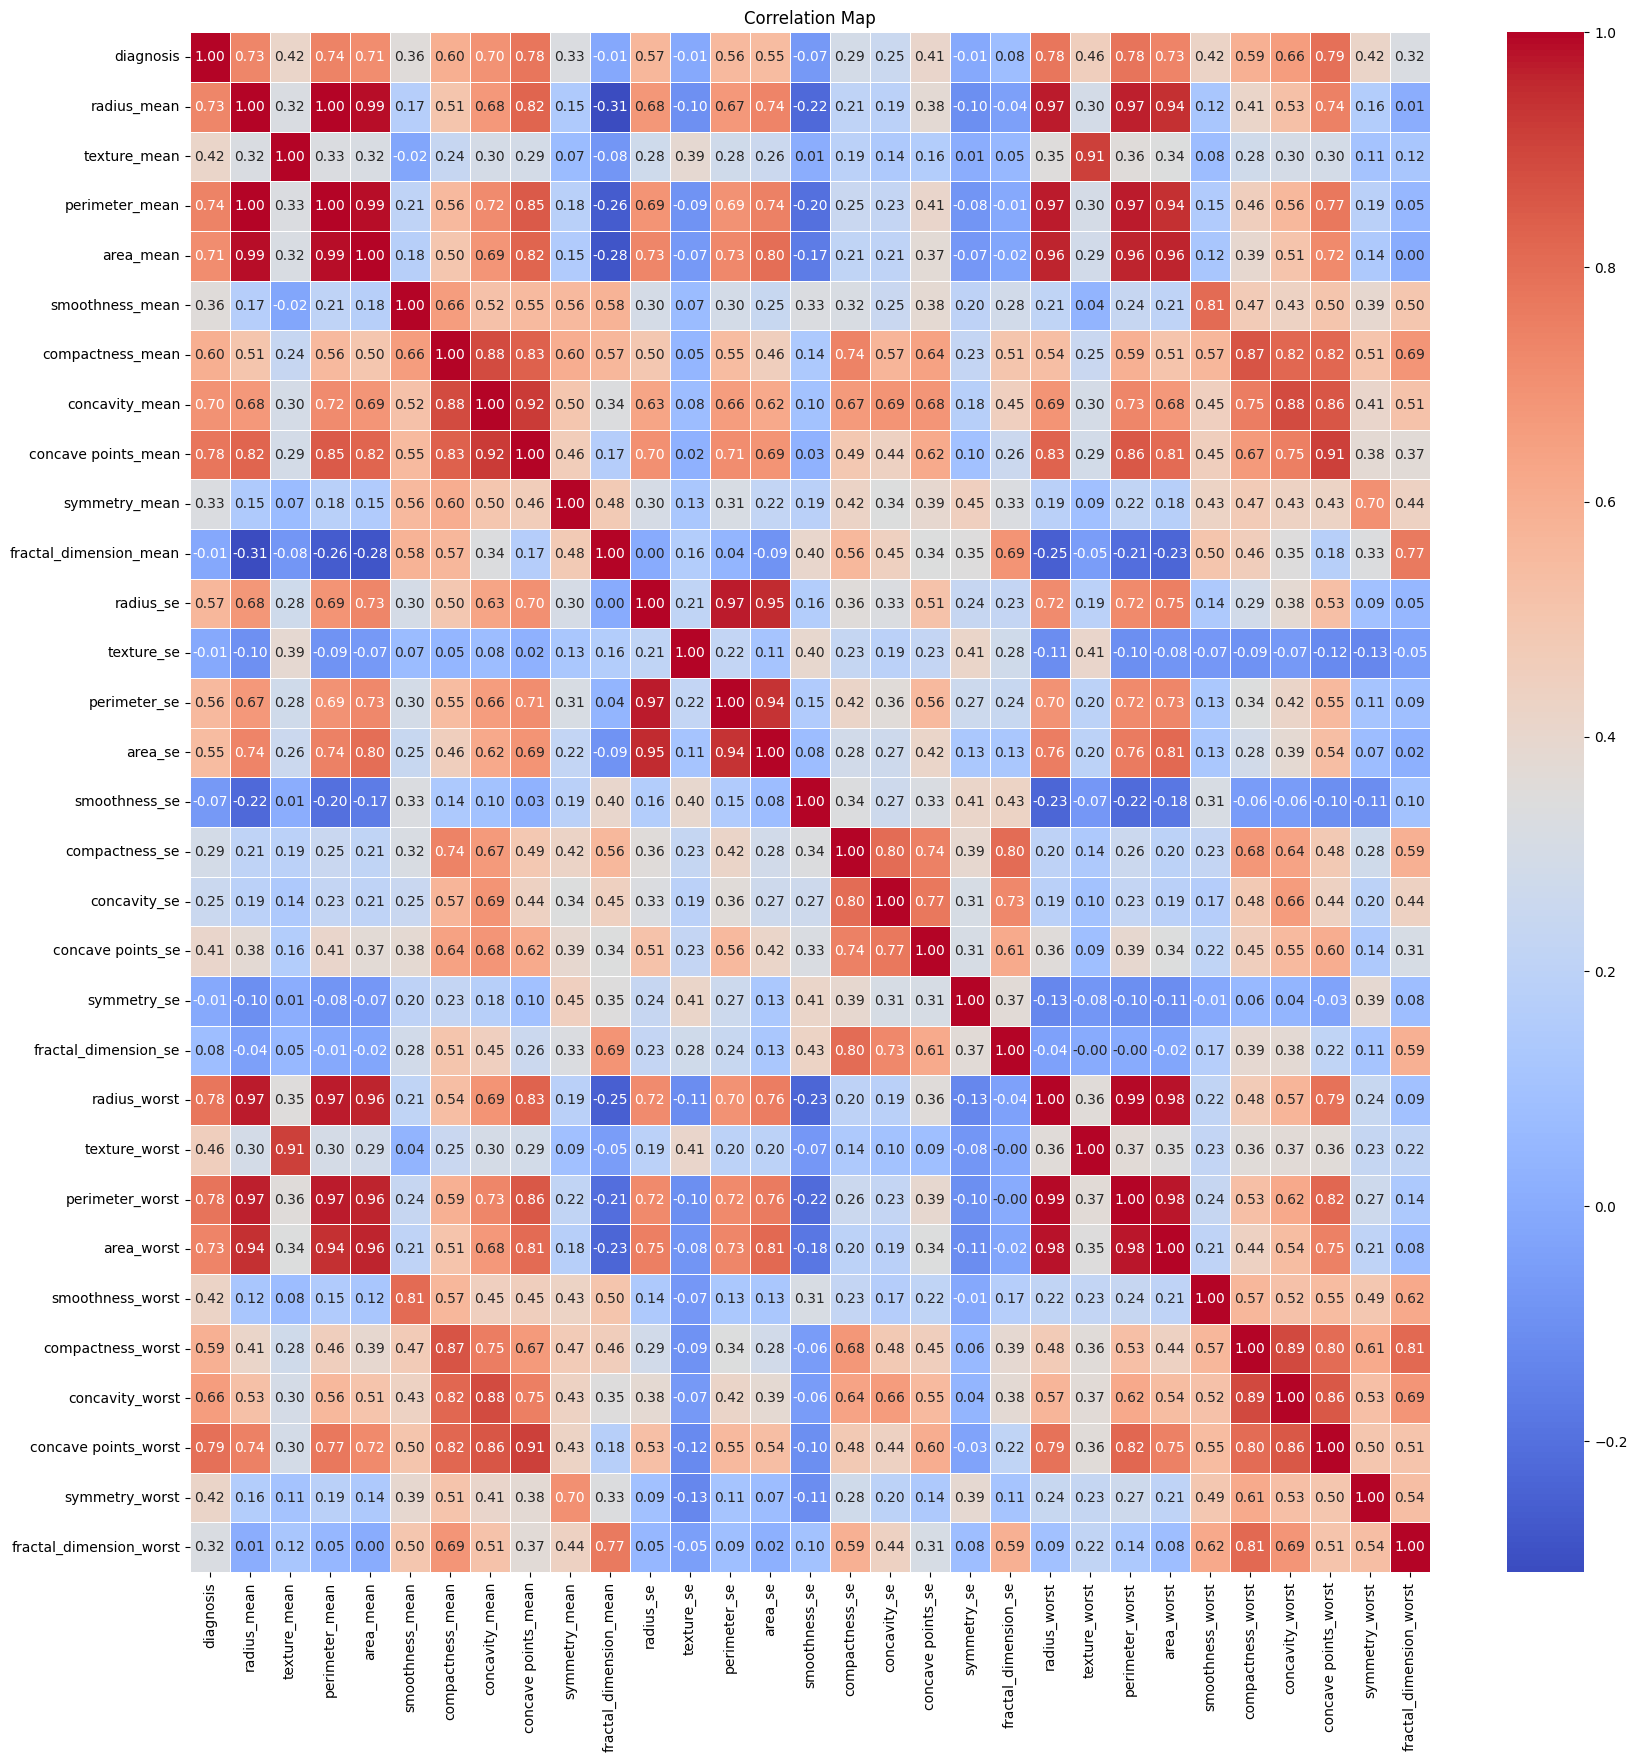

In [4]:
# correlation map
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), cmap="coolwarm", annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

we can immedietly observe another problem:
* Highly correlated features
- The ploblem is when features are correlated is makes it difficult to find the important ones, we will explain it more in the PDF.

## High Correlation Method:

In order to discard the correlated variables we will create groups of variables with correlations higher than 0.8.

In [5]:
# copying the original dataframe
df_copy = df.copy()

We want to seperate by groups with high correlation to one another.

This act will allow us to perform 'feature selection' - select represenatives from each group and see how only they affect the diagnosis

In [6]:
correlation_matrix = df.corr().abs()
threshold = 0.8
# Get the column names
columns = correlation_matrix.columns.tolist()

# Initialize an empty list to store the groups
groups = []

# A set to keep track of columns already grouped
grouped_columns = set()

# Iterate over each column to find groups
for i, col in enumerate(columns):
    if col in grouped_columns:
        continue

    # Start a new group
    current_group = [col]
    grouped_columns.add(col)

    # Compare with other columns
    for j in range(i + 1, len(columns)):
        other_col = columns[j]
        if other_col not in grouped_columns and abs(correlation_matrix[col][other_col]) > threshold:
            current_group.append(other_col)
            grouped_columns.add(other_col)

    # Add the group to the list of groups
    groups.append(current_group)


print(groups)

[['diagnosis'], ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], ['texture_mean', 'texture_worst'], ['smoothness_mean', 'smoothness_worst'], ['compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst'], ['symmetry_mean'], ['fractal_dimension_mean'], ['radius_se', 'perimeter_se', 'area_se'], ['texture_se'], ['smoothness_se'], ['compactness_se', 'concavity_se', 'fractal_dimension_se'], ['concave points_se'], ['symmetry_se'], ['symmetry_worst'], ['fractal_dimension_worst']]


Therefore, the groups will be:

* ['diagnosis']
* ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
* ['texture_mean', 'texture_worst']
* ['smoothness_mean', 'smoothness_worst']
* ['compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst']
* ['symmetry_mean']
* ['fractal_dimension_mean']
* ['radius_se', 'perimeter_se', 'area_se']
* ['texture_se']
* ['smoothness_se']
* ['compactness_se', 'concavity_se', 'fractal_dimension_se']
* ['concave points_se']
* ['symmetry_se']
* ['symmetry_worst']
* ['fractal_dimension_worst']]

Now we will take a repesenative from each group:

using VIF we will find the best represenative

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Optional: Drop any target or unrelated columns, if necessary
# df = df.drop(columns=['diagnosis'])

# Add a constant for the intercept
df = add_constant(df)

# Initialize DataFrame to store VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)

                    feature          VIF
0                     const  1945.673866
1                 diagnosis     4.431144
2               radius_mean  3817.259795
3              texture_mean    11.891280
4            perimeter_mean  3792.697001
5                 area_mean   348.115385
6           smoothness_mean     8.194309
7          compactness_mean    51.445960
8            concavity_mean    71.002747
9       concave points_mean    60.172431
10            symmetry_mean     4.220806
11   fractal_dimension_mean    15.756978
12                radius_se    75.737325
13               texture_se     4.205686
14             perimeter_se    70.398925
15                  area_se    41.196467
16            smoothness_se     4.070801
17           compactness_se    15.366350
18             concavity_se    15.914022
19        concave points_se    11.601253
20              symmetry_se     5.179151
21     fractal_dimension_se     9.724753
22             radius_worst   815.945630
23            te

Dropping irrelevant columns:
- Select a represenatives for each partition

In [8]:
features_of_interest = ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

                feature          VIF
2           radius_mean  3817.259795
4        perimeter_mean  3792.697001
5             area_mean   348.115385
9   concave points_mean    60.172431
22         radius_worst   815.945630
24      perimeter_worst   405.150023
25           area_worst   343.494355


In [9]:
df = df.drop(columns= ['perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], axis=1)

In [10]:
features_of_interest = ['compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

                 feature        VIF
7       compactness_mean  51.445960
8         concavity_mean  71.002747
27     compactness_worst  36.984867
28       concavity_worst  32.090394
29  concave points_worst  36.781339


In [11]:
df = df.drop(columns=['compactness_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst'], axis=1)

In [12]:
features_of_interest = ['texture_mean', 'texture_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

          feature        VIF
3    texture_mean  11.891280
23  texture_worst  18.606605


In [13]:
df = df.drop(columns=['texture_worst'], axis=1)

In [14]:
features_of_interest = ['smoothness_mean', 'smoothness_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

             feature        VIF
6    smoothness_mean   8.194309
26  smoothness_worst  10.925968


In [15]:
df = df.drop(columns=['smoothness_worst'], axis=1)

In [16]:
features_of_interest = ['compactness_se', 'concavity_se', 'fractal_dimension_se']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

                 feature        VIF
17        compactness_se  15.366350
18          concavity_se  15.914022
21  fractal_dimension_se   9.724753


In [17]:
df = df.drop(columns=['compactness_se', 'fractal_dimension_se'], axis=1)

In [18]:
features_of_interest = ['radius_se', 'perimeter_se', 'area_se']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

         feature        VIF
12     radius_se  75.737325
14  perimeter_se  70.398925
15       area_se  41.196467


In [19]:
df = df.drop(columns=['perimeter_se', 'area_se'], axis=1)

In [20]:
df = df.drop(columns=['const'], axis=1)

In [21]:
# df is now the reduced data set after performing feature selection based on VIF
df

diagnosis  radius_mean  texture_mean  smoothness_mean  concavity_mean  \
0            1        17.99         10.38          0.11840         0.30010   
1            1        20.57         17.77          0.08474         0.08690   
2            1        19.69         21.25          0.10960         0.19740   
3            1        11.42         20.38          0.14250         0.24140   
4            1        20.29         14.34          0.10030         0.19800   
..         ...          ...           ...              ...             ...   
564          1        21.56         22.39          0.11100         0.24390   
565          1        20.13         28.25          0.09780         0.14400   
566          1        16.60         28.08          0.08455         0.09251   
567          1        20.60         29.33          0.11780         0.35140   
568          0         7.76         24.54          0.05263         0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     smoothness_se  concavity_se  concave points_se  symmetry_se  \
0         0.006399       0.05373            0.01587      0.03003   
1         0.005225       0.01860            0.01340      0.01389   
2         0.006150       0.03832            0.02058      0.02250   
3         0.009110       0.05661            0.01867      0.05963   
4         0.011490       0.05688            0.01885      0.01756   
..             ...           ...                ...          ...   
564       0.010300       0.05198            0.02454      0.01114   
565       0.005769       0.03950            0.01678      0.01898   
566       0.005903       0.04730            0.01557      0.01318   
567       0.006522       0.07117            0.01664      0.02324   
568       0.007189       0.00000            0.00000      0.02676   

     symmetry_worst  fractal_dimension_worst  
0            0.4601                  0.11890  
1            0.2750                  0.08902  
2            0.3613                  0.08758  
3            0.6638                  0.17300  
4            0.2364                  0.07678  
..              ...                      ...  
564          0.2060                  0.07115  
565          0.2572                  0.06637  
566          0.2218                  0.07820  
567          0.4087                  0.12400  
568          0.2871                  0.07039  

[569 rows x 15 columns]

We are now left with the represenatives we wanted!

## Hirerachical Clustering Method:

We will look at another way to pick the best represenative features, and evaluate the connection between the features in order to make the best choice to achive our goal

In [22]:
data = df_copy
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

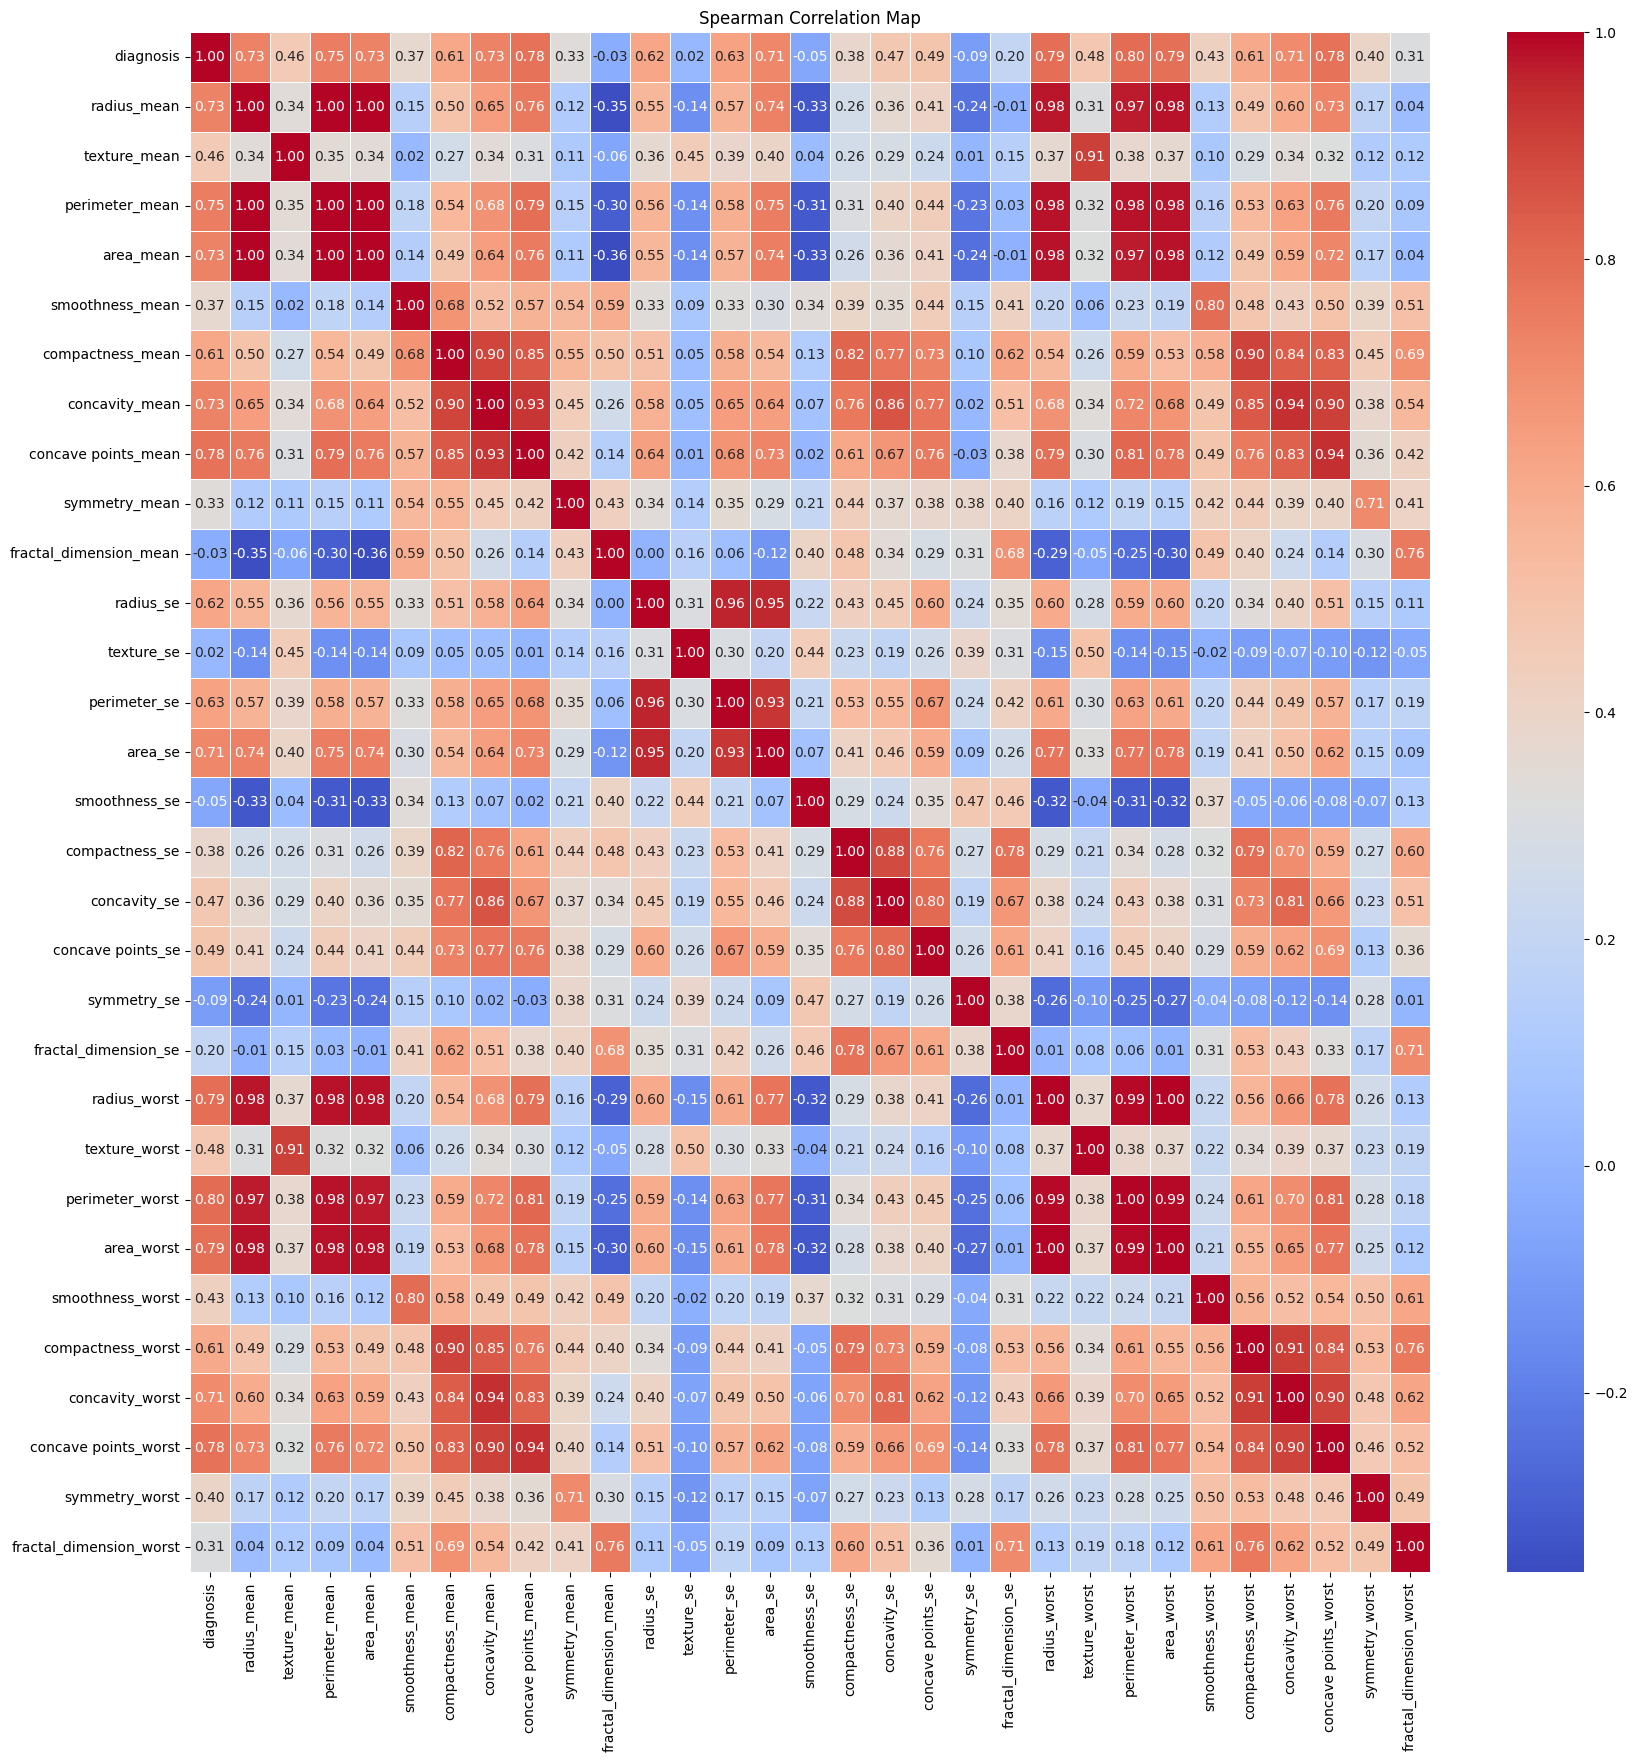

In [23]:
# Calculate the Spearman correlation matrix:
spearman_corr = data.corr(method='spearman')

# Create the heatmap
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(spearman_corr, cmap="coolwarm", annot=True, linewidths=0.5, fmt=".2f", ax=ax)

# Adjust the ticks and title
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Spearman Correlation Map')

# Show the plot
plt.show()

Now let's use clustering to devied the data into groups.

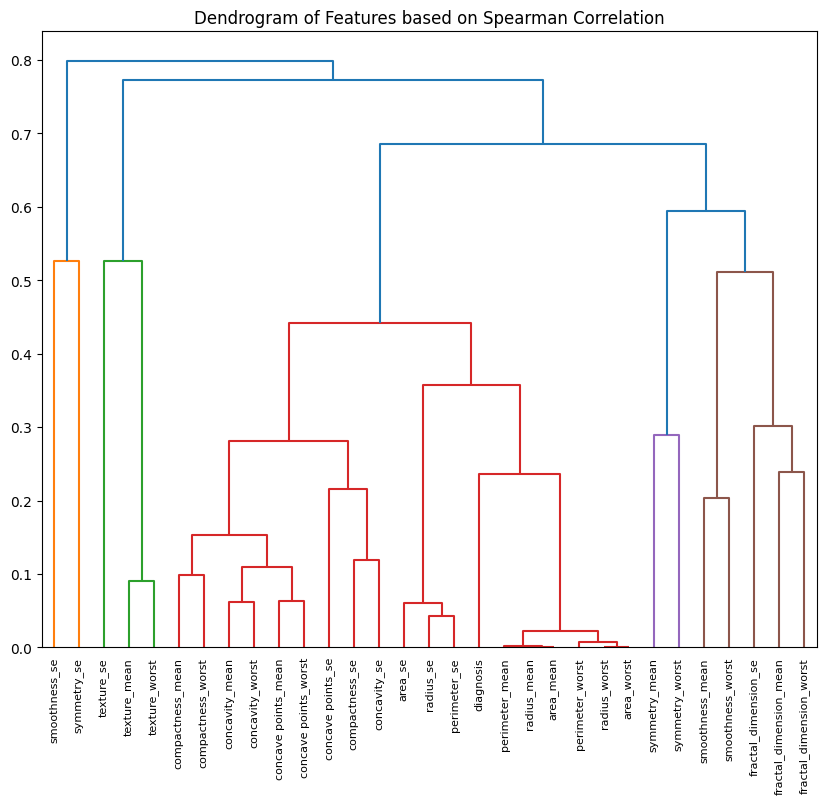

                    Feature  Cluster
15            smoothness_se        1
19              symmetry_se        2
2              texture_mean        3
22            texture_worst        3
12               texture_se        4
26        compactness_worst        5
6          compactness_mean        5
7            concavity_mean        5
8       concave points_mean        5
18        concave points_se        5
28     concave points_worst        5
16           compactness_se        5
17             concavity_se        5
27          concavity_worst        5
11                radius_se        6
13             perimeter_se        6
14                  area_se        6
24               area_worst        7
21             radius_worst        7
23          perimeter_worst        7
0                 diagnosis        7
4                 area_mean        7
3            perimeter_mean        7
1               radius_mean        7
29           symmetry_worst        8
9             symmetry_mean        8
5

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

# Calculate the Spearman correlation matrix
spearman_corr = data.corr(method='spearman')

# Convert the correlation matrix to a distance matrix (1 - correlation)
distance_matrix = 1 - np.abs(spearman_corr)

# Convert the square distance matrix to a condensed distance matrix
condensed_distance_matrix = squareform(distance_matrix)

# Perform hierarchical clustering
Z = linkage(condensed_distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=spearman_corr.columns, leaf_rotation=90)
plt.title('Dendrogram of Features based on Spearman Correlation')
plt.show()

# Optional: Create clusters based on a chosen threshold
max_d = 0.3  # Define the maximum distance (1-correlation) to cut the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Show features grouped by their clusters
clustered_features = pd.DataFrame({'Feature': data.columns, 'Cluster': clusters})
print(clustered_features.sort_values(by='Cluster'))

## feature selection:

In [25]:
# exculding 7: ['area_worst', 'radius_worst', 'perimeter_worst', 'area_mean', 'perimeter_mean', 'radius_mean'],
# because they are in the same cluster as diagnosis which is our target, so they are valuble for its prediction

cluster_mapping = {
    1: ['smoothness_se'],
    2: ['symmetry_se'],
    3: ['texture_mean', 'texture_worst'],
    4: ['texture_se'],
    5: ['compactness_worst', 'compactness_mean', 'concavity_mean', 'concave points_mean',
        'concave points_se', 'concave points_worst', 'compactness_se', 'concavity_se', 'concavity_worst'],
    6: ['radius_se', 'perimeter_se', 'area_se'],

    8: ['symmetry_worst', 'symmetry_mean'],
    9: ['smoothness_mean', 'smoothness_worst'],
    10: ['fractal_dimension_mean', 'fractal_dimension_worst'],
    11: ['fractal_dimension_se']
}

# Calculate the correlation matrix using Spearman correlation
corr_matrix = data.corr(method='spearman').abs()

# Function to select the most representative feature within a cluster
def select_representative_feature(cluster_features, corr_matrix):
    # Subset the correlation matrix to the features in the cluster
    cluster_corr_matrix = corr_matrix.loc[cluster_features, cluster_features]
    # Calculate the average correlation of each feature with all other features in the cluster
    avg_corr = cluster_corr_matrix.mean(axis=1)
    # Return the feature with the highest average correlation
    return avg_corr.idxmax()

# Initialize a list to hold the selected features
selected_features = []

# Iterate through each cluster and select the representative feature
for cluster_id, cluster_features in cluster_mapping.items():
    representative_feature = select_representative_feature(cluster_features, corr_matrix)
    selected_features.append(representative_feature)

# Drop 'diagnosis' from the original DataFrame
data = data.drop(columns=['diagnosis'])

# Create a new DataFrame with only the selected features
data_selected = data[selected_features]

# Now df_selected contains only the most representative features
print("Selected features:", selected_features)


Selected features: ['smoothness_se', 'symmetry_se', 'texture_mean', 'texture_se', 'concavity_mean', 'radius_se', 'symmetry_worst', 'smoothness_mean', 'fractal_dimension_mean', 'fractal_dimension_se']


In [26]:
# Adding cluster 7:  ['area_worst', 'radius_worst', 'perimeter_worst', 'area_mean', 'perimeter_mean', 'radius_mean']
# Assuming the previous code has been run and 'selected_features' is already defined
# Add the specified features to the selected_features list
additional_features = ['area_worst', 'radius_worst', 'perimeter_worst', 'area_mean', 'perimeter_mean', 'radius_mean']
selected_features.extend(additional_features)

# Now, 'selected_features' contains the most representative features plus the additional ones
print("Updated Selected features:", selected_features)

Updated Selected features: ['smoothness_se', 'symmetry_se', 'texture_mean', 'texture_se', 'concavity_mean', 'radius_se', 'symmetry_worst', 'smoothness_mean', 'fractal_dimension_mean', 'fractal_dimension_se', 'area_worst', 'radius_worst', 'perimeter_worst', 'area_mean', 'perimeter_mean', 'radius_mean']


Now lets pick one method, VIF or Hirerachical Clustering(USING SPEARMAN CORRELATION):

In [27]:
from sklearn.model_selection import cross_val_score
from scipy.stats import shapiro, ttest_rel, wilcoxon
import numpy as np
from sklearn.svm import SVC

# Initialize the SVC with a linear kernel
svc_linear = SVC(kernel='linear')

# Perform cross-validation for VIF-selected features
df_vif = df.drop(columns=['diagnosis'])
scores_vif = cross_val_score(svc_linear, df_vif, df['diagnosis'], cv=30, scoring='accuracy')

# Perform cross-validation for Hierarchical Clustering-selected features
df_hier = data_selected
scores_hier = cross_val_score(svc_linear, df_hier, df['diagnosis'], cv=30, scoring='accuracy')

In [28]:
# Check if the performance scores are normally distributed using Shapiro-Wilk test
shapiro_vif = shapiro(scores_vif)
shapiro_hier = shapiro(scores_hier)

print("Shapiro-Wilk test results for VIF-selected features:")
print(f"Statistic: {shapiro_vif.statistic}, P-value: {shapiro_vif.pvalue}")

print("\nShapiro-Wilk test results for Hierarchical Clustering-selected features:")
print(f"Statistic: {shapiro_hier.statistic}, P-value: {shapiro_hier.pvalue}")

# Determine which statistical test to use based on normality results
if shapiro_vif.pvalue > 0.05 and shapiro_hier.pvalue > 0.05:
    print("\nBoth distributions are normal. Proceeding with Paired t-test.")
    # Perform a paired t-test
else:
    print("\nAt least one distribution is not normal. Proceeding with Wilcoxon signed-rank test.")
    # Perform a Wilcoxon signed-rank test

Shapiro-Wilk test results for VIF-selected features:
Statistic: 0.892532234056557, P-value: 0.005542083247243248

Shapiro-Wilk test results for Hierarchical Clustering-selected features:
Statistic: 0.9127348447379324, P-value: 0.017452708351150495

At least one distribution is not normal. Proceeding with Wilcoxon signed-rank test.


In [29]:
scores_hier-scores_vif

array([ 0.05263158, -0.10526316,  0.        ,  0.05263158,  0.        ,
        0.        ,  0.10526316, -0.10526316, -0.05263158,  0.        ,
        0.        ,  0.05263158, -0.05263158, -0.10526316,  0.        ,
        0.        ,  0.05263158, -0.05263158, -0.05263158, -0.10526316,
        0.        , -0.05263158,  0.05263158, -0.10526316, -0.05263158,
        0.        ,  0.        , -0.05263158,  0.05263158,  0.        ])

In [30]:
from scipy.stats import binomtest

# Calculate differences
differences = scores_hier - scores_vif

# Count positive, negative, and zero differences
pos_diff = np.sum(differences > 0)
neg_diff = np.sum(differences < 0)
num_tests = pos_diff + neg_diff  # Exclude zero differences

# Perform the Sign Test using binomtest
sign_test_result = binomtest(min(pos_diff, neg_diff), n=num_tests, p=0.5)

print(f"Sign Test P-value: {sign_test_result.pvalue}")

# Interpretation
if sign_test_result.pvalue < 0.05:
    print("Significant difference (reject H0)")
else:
    print("No significant difference (fail to reject H0)")

Sign Test P-value: 0.359283447265625
No significant difference (fail to reject H0)


Based on this sign-test, we can see that there is no significant difference in performance between the two feature selection methods and this is why we will stick to the first method from now on.

# Statistical analysis

before performing ML on our data, we want to keep exploring connections between features using statistical analysis, in order to prove mathematcly our findings.

firstly, we would like to find how our features are disterbuted:

Perform a normality test using the Shapiro-Wilk test for small samples
and the Kolmogorov-Smirnov test for larger samples.

* Parameters:

  data (list or array-like): The sample data to test for normality.
threshold (int): The sample size threshold to switch between tests. Default is 30.

* Returns:

  test_name (str): The name of the test performed.

  statistic (float): The test statistic.

  p_value (float): The p-value of the test.

### Normality test

In [31]:
def check_normality(data, threshold=30):
    n = len(data)

    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

    print("p value:%.4f" % p_value)
    if p_value <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [32]:
for column in df.columns:
    print(f"Analyzing Column: {column}")
    check_normality(df[column])
    print("")

Analyzing Column: diagnosis
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Analyzing Column: radius_mean
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Analyzing Column: texture_mean
p value:0.1246
Fail to reject null hypothesis >> The data is normally distributed

Analyzing Column: smoothness_mean
p value:0.4386
Fail to reject null hypothesis >> The data is normally distributed

Analyzing Column: concavity_mean
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Analyzing Column: symmetry_mean
p value:0.0942
Fail to reject null hypothesis >> The data is normally distributed

Analyzing Column: fractal_dimension_mean
p value:0.0001
Reject null hypothesis >> The data is not normally distributed

Analyzing Column: radius_se
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Analyzing Column: texture_se
p value:0.0002
Reject null hypothesis >> The data is not normally dist

normally disterbuted parametrs:
* texture_mean
* smoothness_mean
* symmetry_mean

we can perform hypothesis test on our normally disterbuted data:

* Null Hypothesis (H_0): There is a significant difference in the mean texture between the cancer group (diagnosis == ‘M’) and the non-cancer group (diagnosis == ‘B’) for individuals with texture values above the mean.
* Alternative Hypothesis (H_1): There is no significant difference in the mean texture between the cancer group (diagnosis == ‘M’) and the non-cancer group (diagnosis == ‘B’) for individuals with texture values above the mean.

In [33]:
# Calculate the mean texture for the entire dataset
mean_texture = df['texture_mean'].mean()
print(f"Mean texture: {mean_texture}")

# Create a binary variable indicating if the texture is above the mean
df['texture_above_mean'] = df['texture_mean'] > mean_texture

# Check the distribution of the binary variable
print("Distribution of 'texture_above_mean':")
print(df['texture_above_mean'].value_counts())

# Separate the data into cancer (diagnosis == 'M') and non-cancer (diagnosis == 'B') groups
cancer_group = df[df['diagnosis'] == 1]
non_cancer_group = df[df['diagnosis'] == 0]

# Ensure the binary column is correctly evaluated within the groups
cancer_group = cancer_group[cancer_group['texture_above_mean']]
non_cancer_group = non_cancer_group[non_cancer_group['texture_above_mean']]

# Calculate the mean texture for people with texture above the mean in both groups
cancer_above_mean_texture = cancer_group['texture_mean']
non_cancer_above_mean_texture = non_cancer_group['texture_mean']

# Check the number of entries in each group
num_cancer_above_mean = cancer_above_mean_texture.shape[0]
num_non_cancer_above_mean = non_cancer_above_mean_texture.shape[0]

# Basic statistics for each group
stats_cancer_above_mean = cancer_above_mean_texture.describe()
stats_non_cancer_above_mean = non_cancer_above_mean_texture.describe()

# Perform an independent two-sample T-test
t_stat, p_value = stats.ttest_ind(cancer_above_mean_texture, non_cancer_above_mean_texture, nan_policy='omit')
print(f"\nT-Test: t-statistic = {t_stat}, p-value = {p_value}")

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Fail to reject the null hypothesis. There is a significant difference in texture values between the cancer and non-cancer groups.")
else:
    print("Reject the null hypothesis. There is no significant difference in texture values between the cancer and non-cancer groups.")

Mean texture: 19.289648506151142
Distribution of 'texture_above_mean':
texture_above_mean
False    306
True     263
Name: count, dtype: int64

T-Test: t-statistic = 0.5386896443691584, p-value = 0.5905601652242836
Reject the null hypothesis. There is no significant difference in texture values between the cancer and non-cancer groups.


* Null Hypothesis (H_0): There is a significant difference in the mean smoothness between individuals with cancer and individuals without cancer for those with smoothness values above the mean.
* Alternative Hypothesis (H_1): There is no significant difference in the mean smoothness between individuals with cancer and individuals without cancer for those with smoothness values above the mean.

In [34]:
# Calculate the mean smoothness for the entire dataset
mean_smoothness = df['smoothness_mean'].mean()
print(f"Mean smoothness: {mean_smoothness}")

# Create a binary variable indicating if the smoothness is above the mean
df['smoothness_above_mean'] = df['smoothness_mean'] > mean_smoothness

# Check the distribution of the binary variable
print("Distribution of 'smoothness_above_mean':")
print(df['smoothness_above_mean'].value_counts())

# Separate the data into cancer (diagnosis == 'M') and non-cancer (diagnosis == 'B') groups
cancer_group = df[df['diagnosis'] == 1]
non_cancer_group = df[df['diagnosis'] == 0]

# Ensure the binary column is correctly evaluated within the groups
cancer_group_above_mean = cancer_group[cancer_group['smoothness_above_mean'] == True]
non_cancer_group_above_mean = non_cancer_group[non_cancer_group['smoothness_above_mean'] == True]

# Calculate the mean smoothness for people with smoothness above the mean in both groups
cancer_above_mean_smoothness = cancer_group_above_mean['smoothness_mean']
non_cancer_above_mean_smoothness = non_cancer_group_above_mean['smoothness_mean']

# Check the number of entries in each group
num_cancer_above_mean = cancer_above_mean_smoothness.shape[0]
num_non_cancer_above_mean = non_cancer_above_mean_smoothness.shape[0]

# Basic statistics for each group
stats_cancer_above_mean = cancer_above_mean_smoothness.describe()
stats_non_cancer_above_mean = non_cancer_above_mean_smoothness.describe()


# Perform an independent two-sample T-test
if num_cancer_above_mean > 0 and num_non_cancer_above_mean > 0:
    t_stat, p_value = stats.ttest_ind(cancer_above_mean_smoothness, non_cancer_above_mean_smoothness, nan_policy='omit')
    print(f"\nT-Test: t-statistic = {t_stat}, p-value = {p_value}")

    # Interpretation
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("Fail to reject the null hypothesis. There is a significant difference in smoothness values between the cancer and non-cancer groups.")
    else:
        print("Reject the null hypothesis. There is no significant difference in smoothness values between the cancer and non-cancer groups.")
else:
    print("Insufficient data for T-Test. One or both groups have zero entries.")

Mean smoothness: 0.0963602811950791
Distribution of 'smoothness_above_mean':
smoothness_above_mean
False    289
True     280
Name: count, dtype: int64

T-Test: t-statistic = 2.6936771637046046, p-value = 0.007496488593518108
Fail to reject the null hypothesis. There is a significant difference in smoothness values between the cancer and non-cancer groups.


* Null Hypothesis (H_0): There is a significant difference in the mean symmetry between individuals with cancer and individuals without cancer for those with smoothness values above the mean.
* Alternative Hypothesis (H_1): There is no significant difference in the mean symmetry between individuals with cancer and individuals without cancer for those with smoothness values above the mean.

In [35]:
# Calculate the mean symmetry for the entire dataset
mean_symmetry = df['symmetry_mean'].mean()
print(f"Mean symmetry: {mean_symmetry}")

# Create a binary variable indicating if the symmetry is above the mean
df['symmetry_above_mean'] = df['symmetry_mean'] > mean_symmetry

# Check the distribution of the binary variable
print("Distribution of 'symmetry_above_mean':")
print(df['symmetry_above_mean'].value_counts())

# Separate the data into cancer (diagnosis == 'M') and non-cancer (diagnosis == 'B') groups
cancer_group = df[df['diagnosis'] == 1]
non_cancer_group = df[df['diagnosis'] == 0]

# Ensure the binary column is correctly evaluated within the groups
cancer_group_above_mean = cancer_group[cancer_group['symmetry_above_mean'] == True]
non_cancer_group_above_mean = non_cancer_group[non_cancer_group['symmetry_above_mean'] == True]

# Calculate the mean symmetry for people with symmetry above the mean in both groups
cancer_above_mean_symmetry = cancer_group_above_mean['symmetry_mean']
non_cancer_above_mean_symmetry = non_cancer_group_above_mean['symmetry_mean']

# Check the number of entries in each group
num_cancer_above_mean = cancer_above_mean_symmetry.shape[0]
num_non_cancer_above_mean = non_cancer_above_mean_symmetry.shape[0]

# Basic statistics for each group
stats_cancer_above_mean = cancer_above_mean_symmetry.describe()
stats_non_cancer_above_mean = non_cancer_above_mean_symmetry.describe()

# Perform an independent two-sample T-test
if num_cancer_above_mean > 0 and num_non_cancer_above_mean > 0:
    t_stat, p_value = stats.ttest_ind(cancer_above_mean_symmetry, non_cancer_above_mean_symmetry, nan_policy='omit')
    print(f"\nT-Test: t-statistic = {t_stat}, p-value = {p_value}")

    # Interpretation
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("Fail to reject the null hypothesis. There is a significant difference in symmetry values between the cancer and non-cancer groups.")
    else:
        print("Reject the null hypothesis. There is no significant difference in symmetry values between the cancer and non-cancer groups.")
else:
    print("Insufficient data for T-Test. One or both groups have zero entries.")

Mean symmetry: 0.18116186291739894
Distribution of 'symmetry_above_mean':
symmetry_above_mean
False    305
True     264
Name: count, dtype: int64

T-Test: t-statistic = 3.361463097728235, p-value = 0.0008909260105463085
Fail to reject the null hypothesis. There is a significant difference in symmetry values between the cancer and non-cancer groups.


#### non normally disterbuted data:
* diagnosis
* radius_mean
* texture_mean
* smoothness_mean
* compactness_mean
* symmetry_mean
* fractal_dimension_mean
* radius_se
* texture_se
* smoothness_se
* compactness_se
* concave points_se
* symmetry_se
* symmetry_worst
* fractal_dimension_worst

We want to continue exploring the features to understand which ones truly create the separation between benign and malignant cancer.

we will use a method called Goodness-of-Fit

* [Goodness of Fit](https://medium.com/@sigari.salman/discovering-the-best-fit-probability-distribution-for-your-data-a14c0e8d762)

In [36]:
df = df.drop(columns=['smoothness_above_mean', 'symmetry_above_mean', 'texture_above_mean'])
df

diagnosis  radius_mean  texture_mean  smoothness_mean  concavity_mean  \
0            1        17.99         10.38          0.11840         0.30010   
1            1        20.57         17.77          0.08474         0.08690   
2            1        19.69         21.25          0.10960         0.19740   
3            1        11.42         20.38          0.14250         0.24140   
4            1        20.29         14.34          0.10030         0.19800   
..         ...          ...           ...              ...             ...   
564          1        21.56         22.39          0.11100         0.24390   
565          1        20.13         28.25          0.09780         0.14400   
566          1        16.60         28.08          0.08455         0.09251   
567          1        20.60         29.33          0.11780         0.35140   
568          0         7.76         24.54          0.05263         0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     smoothness_se  concavity_se  concave points_se  symmetry_se  \
0         0.006399       0.05373            0.01587      0.03003   
1         0.005225       0.01860            0.01340      0.01389   
2         0.006150       0.03832            0.02058      0.02250   
3         0.009110       0.05661            0.01867      0.05963   
4         0.011490       0.05688            0.01885      0.01756   
..             ...           ...                ...          ...   
564       0.010300       0.05198            0.02454      0.01114   
565       0.005769       0.03950            0.01678      0.01898   
566       0.005903       0.04730            0.01557      0.01318   
567       0.006522       0.07117            0.01664      0.02324   
568       0.007189       0.00000            0.00000      0.02676   

     symmetry_worst  fractal_dimension_worst  
0            0.4601                  0.11890  
1            0.2750                  0.08902  
2            0.3613                  0.08758  
3            0.6638                  0.17300  
4            0.2364                  0.07678  
..              ...                      ...  
564          0.2060                  0.07115  
565          0.2572                  0.06637  
566          0.2218                  0.07820  
567          0.4087                  0.12400  
568          0.2871                  0.07039  

[569 rows x 15 columns]

In [37]:
# List of columns to fit distributions to
columns_to_fit = [
    'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
    'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'smoothness_se',
    'concave points_se', 'symmetry_se', 'symmetry_worst', 'fractal_dimension_worst'
]

In [38]:
from scipy.stats import expon, gamma, lognorm, beta, norm, kstest

# Function to fit and evaluate different distributions
def fit_distributions(data):
    distributions = {
        'normal': norm,
        'exponential': expon,
        'gamma': gamma,
        'lognormal': lognorm,
        'beta': beta
    }

    best_fit_name = None
    best_fit_params = None
    best_sse = np.inf

    for name, distribution in distributions.items():
        try:
            params = distribution.fit(data)

            # Calculate the SSE (Sum of Squared Errors) as a goodness-of-fit measure
            sse = np.sum(np.power(data - distribution.pdf(np.arange(len(data)), *params), 2.0))

            if best_sse > sse:
                best_sse = sse
                best_fit_name = name
                best_fit_params = params
        except Exception as e:
            continue

    return best_fit_name, best_fit_params, best_sse

In [39]:
# Fit distributions to each column and print results
for column in columns_to_fit:
    data = df[column].dropna()  # Drop NA values to avoid errors
    best_fit_name, best_fit_params, _ = fit_distributions(data)
    print(f"Best fit for {column}: {best_fit_name} with parameters {best_fit_params}")

Best fit for diagnosis: normal with parameters (0.37258347978910367, 0.4834925339416796)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6480: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1995: RuntimeWarning: overflow encountered in divide
  place(output, cond, self._pdf(*goodargs) / scale)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_continuo

Best fit for radius_mean: exponential with parameters (6.981, 7.1462917398945525)
Best fit for texture_mean: exponential with parameters (9.71, 9.579648506151141)
Best fit for smoothness_mean: exponential with parameters (0.05263, 0.043730281195079095)
Best fit for symmetry_mean: exponential with parameters (0.106, 0.07516186291739894)
Best fit for fractal_dimension_mean: gamma with parameters (0.22356863202546146, 0.04995999999999999, 1.1764769047131067)
Best fit for radius_se: normal with parameters (0.40517205623901575, 0.27706894152536526)
Best fit for texture_se: normal with parameters (1.2168534270650264, 0.551163426903576)
Best fit for smoothness_se: exponential with parameters (0.001713, 0.005327978910369069)
Best fit for concave points_se: beta with parameters (7.439774180578095, 118.98242664606948, -0.004888816118008491, 0.28363761496249895)
Best fit for symmetry_se: lognormal with parameters (0.5187462363253601, 0.006431975936964607, 0.012290097259271505)
Best fit for symmet

##### This warnings indicate that there are numerical issues during the fitting process of distributions in the data. These issues often occur when the data has extreme values, such as very large or very small numbers, or when the distribution fitting process is not well-suited for the specific data. thus we will check using statistic tests the fits.

In [40]:
# Mapping distribution names to scipy.stats names
distribution_name_map = {
    'normal': 'norm',
    'exponential': 'expon',
    'gamma': 'gamma',
    'lognormal': 'lognorm',
    'beta': 'beta'
}

In [41]:
# Function to apply goodness-of-fit tests
def goodness_of_fit_test(data, best_fit_name, best_fit_params):
    result = {}

    # Map the distribution name for K-S test
    scipy_dist_name = distribution_name_map.get(best_fit_name, best_fit_name)

    # Perform the Kolmogorov-Smirnov test for the best-fit distribution
    if scipy_dist_name in ['norm', 'expon', 'gamma', 'lognorm', 'beta']:
        test_stat, p_value = kstest(data, scipy_dist_name, args=best_fit_params)
        result['K-S Test'] = {'Statistic': test_stat, 'p-value': p_value}

    # Perform the Anderson-Darling test only for supported distributions
    if scipy_dist_name in ['norm', 'expon', 'gumbel_l', 'gumbel_r', 'logistic', 'weibull_min']:
        ad_stat, critical_values, significance_level = anderson(data, dist=scipy_dist_name)
        result['A-D Test'] = {'Statistic': ad_stat, 'Critical Values': critical_values, 'Significance Level': significance_level}

    return result

In [42]:
from scipy.stats import kstest, anderson
# Fit distributions to each column and print results
for column in columns_to_fit:
    data = df[column].dropna()  # Drop NA values to avoid errors
    best_fit_name, best_fit_params, _ = fit_distributions(data)
    print(f"Best fit for {column}: {best_fit_name} with parameters {best_fit_params}")

    # Perform goodness-of-fit tests
    fit_results = goodness_of_fit_test(data, best_fit_name, best_fit_params)

    # Print the results
    print(f"Goodness-of-Fit results for {column} (best fit: {best_fit_name}):")
    for test_name, test_result in fit_results.items():
        print(f"{test_name}: {test_result}")
    print("\n" + "="*60 + "\n")  # Separator between results for different columns

Best fit for diagnosis: normal with parameters (0.37258347978910367, 0.4834925339416796)
Goodness-of-Fit results for diagnosis (best fit: normal):
K-S Test: {'Statistic': 0.40694702386782433, 'p-value': 1.126342343910301e-85}
A-D Test: {'Statistic': 110.94896680118984, 'Critical Values': array([0.572, 0.651, 0.782, 0.912, 1.084]), 'Significance Level': array([15. , 10. ,  5. ,  2.5,  1. ])}


Best fit for radius_mean: exponential with parameters (6.981, 7.1462917398945525)
Goodness-of-Fit results for radius_mean (best fit: exponential):
K-S Test: {'Statistic': 0.28395006230749675, 'p-value': 4.3468101733843e-41}
A-D Test: {'Statistic': 154.5790598587513, 'Critical Values': array([0.921, 1.077, 1.34 , 1.604, 1.955]), 'Significance Level': array([15. , 10. ,  5. ,  2.5,  1. ])}


Best fit for texture_mean: exponential with parameters (9.71, 9.579648506151141)
Goodness-of-Fit results for texture_mean (best fit: exponential):
K-S Test: {'Statistic': 0.2803902281636551, 'p-value': 4.6697084

# General Interpretation of the Results

## Best Fit Distribution:
- For each parameter, the “best fit” refers to the distribution that minimizes the sum of squared errors (SSE) between the observed data and the theoretical distribution. This distribution is the one that fits the data best among the tested distributions.
## K-S Test (Kolmogorov-Smirnov Test):
	•	Statistic: This value measures the maximum difference between the empirical cumulative distribution function (ECDF) of the data and the cumulative distribution function (CDF) of the fitted distribution. Smaller values indicate a better fit.
	•	p-value: The p-value represents the probability that the observed data could come from the fitted distribution. A high p-value (typically > 0.05) suggests that the distribution fits the data well. Extremely low p-values (like those seen in most of these results) indicate a poor fit.
## A-D Test (Anderson-Darling Test):
### The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution.
	•	Statistic: This value is similar to the K-S test but gives more weight to the tails of the distribution. Higher values indicate a worse fit.
	•	Critical Values: These are thresholds at different significance levels (15%, 10%, 5%, 2.5%, and 1%). If the A-D statistic exceeds a critical value, the null hypothesis that the data follows the fitted distribution is rejected at that significance level.

## diagnosis
    
    * Best Fit: Normal Distribution with parameters (mean = 0.3726, std = 0.4835).
    * K-S Test:
    * Statistic: 0.407
    * p-value: 1.13e-85 (extremely low, indicating a poor fit).
    * A-D Test:
    * Statistic: 110.95
    * Critical Values: [0.572, 0.651, 0.782, 0.912, 1.084] (at significance levels [15%, 10%, 5%, 2.5%, 1%]).

Interpretation: Despite the normal distribution being the best fit among the tested distributions, the very low p-value and high A-D statistic indicate that this is not a good fit for the diagnosis data.

## radius_mean
    
    * Best Fit: Exponential Distribution with parameters (loc = 6.981, scale = 7.1463).
    * K-S Test:
    * Statistic: 0.284
    * p-value: 4.35e-41 (extremely low, indicating a poor fit).
    * A-D Test:
    * Statistic: 154.58
    * Critical Values: [0.921, 1.077, 1.34, 1.604, 1.955] (at significance levels [15%, 10%, 5%, 2.5%, 1%]).

Interpretation: The exponential distribution is the best fit among those tested, but the very low p-value and high A-D statistic suggest a poor overall fit.

## texture_mean

    * Best Fit: Exponential Distribution with parameters (loc = 9.71, scale = 9.5796).
    * K-S Test:
    * Statistic: 0.280
    * p-value: 4.67e-40 (extremely low, indicating a poor fit).
    * A-D Test:
    * Statistic: 161.59
    * Critical Values: [0.921, 1.077, 1.34, 1.604, 1.955].

Interpretation: Although the exponential distribution was the best fit, the statistical tests indicate that it does not adequately model the texture_mean data.

## smoothness_mean

    * Best Fit: Exponential Distribution with parameters (loc = 0.05263, scale = 0.0437).
    * K-S Test:
    * Statistic: 0.368
    * p-value: 1.07e-69 (extremely low, indicating a poor fit).
    * A-D Test:
    * Statistic: 193.05
    * Critical Values: [0.921, 1.077, 1.34, 1.604, 1.955].

Interpretation: The exponential distribution is not a good fit for smoothness_mean, as indicated by the low p-value and high A-D statistic.

## symmetry_mean

	•	Best Fit: Exponential Distribution with parameters (loc = 0.106, scale = 0.0752).
	•	K-S Test:
	•	Statistic: 0.345
	•	p-value: 6.52e-61 (extremely low, indicating a poor fit).
	•	A-D Test:
	•	Statistic: 192.16
	•	Critical Values: [0.921, 1.077, 1.34, 1.604, 1.955].

Interpretation: The exponential distribution does not fit the symmetry_mean data well, as evidenced by the very low p-value.

## fractal_dimension_mean
                            
    * Best Fit: Gamma Distribution with parameters (shape = 0.2236, loc = 0.05, scale = 1.1765).
    * K-S Test:
    * Statistic: 0.499
    * p-value: 2.36e-131 (extremely low, indicating a poor fit).

Interpretation: Despite the gamma distribution being selected, it does not provide a good fit for fractal_dimension_mean, given the high K-S statistic and low p-value.

## radius_se

	•	Best Fit: Normal Distribution with parameters (mean = 0.4052, std = 0.2771).
	•	K-S Test:
	•	Statistic: 0.168
	•	p-value: 1.39e-14 (indicating a poor fit).
	•	A-D Test:
	•	Statistic: 33.31
	•	Critical Values: [0.572, 0.651, 0.782, 0.912, 1.084].

Interpretation: The normal distribution is not a good fit for radius_se based on the low p-value and high A-D statistic.

## texture_se

	•	Best Fit: Normal Distribution with parameters (mean = 1.2169, std = 0.5512).
	•	K-S Test:
	•	Statistic: 0.089
	•	p-value: 0.00023 (still quite low, indicating a poor fit).
	•	A-D Test:
	•	Statistic: 10.45
	•	Critical Values: [0.572, 0.651, 0.782, 0.912, 1.084].

Interpretation: While the normal distribution is selected, it still does not fit texture_se very well.

## smoothness_se

	•	Best Fit: Exponential Distribution with parameters (loc = 0.001713, scale = 0.00533).
	•	K-S Test:
	•	Statistic: 0.281
	•	p-value: 4.13e-40 (indicating a poor fit).
	•	A-D Test:
	•	Statistic: 109.45
	•	Critical Values: [0.921, 1.077, 1.34, 1.604, 1.955].

Interpretation: The exponential distribution does not fit smoothness_se well.

## concave points_se

	•	Best Fit: Beta Distribution with parameters (shape1 = 7.44, shape2 = 118.98, loc = -0.00489, scale = 0.2836).
	•	K-S Test:
	•	Statistic: 0.0405
	•	p-value: 0.301 (indicating a relatively good fit).

Interpretation: The beta distribution is a better fit for concave points_se compared to other parameters, as indicated by the higher p-value.

## symmetry_se

	•	Best Fit: Lognormal Distribution with parameters (shape = 0.5187, loc = 0.00643, scale = 0.0123).
	•	K-S Test:
	•	Statistic: 0.0284
	•	p-value: 0.739 (indicating a relatively good fit).

Interpretation: The lognormal distribution fits symmetry_se data quite well, as evidenced by the higher p-value.

## symmetry_worst

	•	Best Fit: Exponential Distribution with parameters (loc = 0.1565, scale = 0.1336).
	•	K-S Test:
	•	Statistic: 0.313
	•	p-value: 4.92e-50 (indicating a poor fit).
	•	A-D Test:
	•	Statistic: 172.30
	•	Critical Values: [0.921, 1.077, 1.34, 1.604, 1.955].

Interpretation: The exponential distribution is not a good fit for symmetry_worst.
## fractal_dimension_worst

	•	Best Fit: Gamma Distribution with parameters (shape = 0.2523, loc = 0.05504, scale = 0.8505).
	•	K-S Test:
	•	Statistic: 0.3919
	•	p-value: 3.09e-79 (extremely low, indicating a poor fit).

Interpretation: The gamma distribution is the best fit among the tested distributions, but the very low p-value and high K-S statistic indicate that it is not a good overall fit for the fractal_dimension_worst data.

## Summary of Good Fits:

* concave points_se (Beta distribution): The relatively high p-value indicates that the beta distribution is a good fit for this data.
* symmetry_se (Lognormal distribution): The high p-value indicates that the lognormal distribution is a good fit for this data.

we couldn't fit any feature to normal disterbution, hence we will now use non-parametric tests

Now, we will perform hypothesis test on our non-normally disterbuted data

* Null Hypothesis (H0): There is no significant difference in the diagnosis between individuals with cancer and those without cancer, for those with radius_mean values above the mean.
* Alternative Hypothesis (H1): There is a significant difference in the diagnosis between individuals with cancer and those without cancer, for those with radius_mean values above the mean.

In [43]:
from scipy.stats import mannwhitneyu

# Calculate the mean of 'radius_mean'
radius_mean_threshold = df['radius_mean'].mean()

# Split the data into two groups based on 'radius_mean'
above_mean = df[df['radius_mean'] > radius_mean_threshold]
below_or_equal_mean = df[df['radius_mean'] <= radius_mean_threshold]

# Assuming 'diagnosis' column is binary where 1 represents cancer and 0 represents no cancer
# Extract diagnosis data for both groups
above_mean_diagnosis = above_mean['diagnosis']
below_or_equal_mean_diagnosis = below_or_equal_mean['diagnosis']

# Perform the Mann-Whitney U Test
stat, p = mannwhitneyu(above_mean_diagnosis, below_or_equal_mean_diagnosis)

print('Mann-Whitney U Test Statistic:', stat)
print('P-value:', p)

# Interpret the result
if p > 0.05:
    print('No significant difference (fail to reject H0)')
else:
    print('Significant difference (reject H0)')

Mann-Whitney U Test Statistic: 66013.0
P-value: 1.6263803145166727e-64
Significant difference (reject H0)


Null Hypothesis (H0): H0: There is no significant difference in the symmetry_se values between the cancer group (diagnosis = 1) and the non-cancer group (diagnosis = 0) when considering individuals with radius_mean above the overall mean.

Alternative Hypothesis (H1): H1: There is a significant difference in the symmetry_se values between the cancer group (diagnosis = 1) and the non-cancer group (diagnosis = 0) when considering individuals with symmetry_se above the overall mean.


In [44]:
# Calculate the overall mean of 'symmetry_se'
radius_mean_threshold = df['symmetry_se'].mean()

# Create subsets for cancer and non-cancer groups
cancer_group = df[df['diagnosis'] == 1]
non_cancer_group = df[df['diagnosis'] == 0]

# Further filter these groups to only include individuals with 'radius_mean' above the overall mean
cancer_above_mean = cancer_group[cancer_group['symmetry_se'] > radius_mean_threshold]
non_cancer_above_mean = non_cancer_group[non_cancer_group['symmetry_se'] > radius_mean_threshold]

# Perform the Mann-Whitney U Test on these subgroups
stat, p = mannwhitneyu(cancer_above_mean['symmetry_se'], non_cancer_above_mean['symmetry_se'])

print('Mann-Whitney U Test Statistic:', stat)
print('P-value:', p)

# Interpret the result
if p > 0.05:
    print('No significant difference (fail to reject H0)')
else:
    print('Significant difference (reject H0)')

Mann-Whitney U Test Statistic: 5238.5
P-value: 0.41518201482381045
No significant difference (fail to reject H0)


Null Hypothesis (H0): H0: There is no significant difference in the symmetry_worst values between the cancer group (diagnosis = 1) and the non-cancer group (diagnosis = 0) when considering individuals with radius_mean above the overall mean.

Alternative Hypothesis (H1): H1: There is a significant difference in the symmetry_worst values between the cancer group (diagnosis = 1) and the non-cancer group (diagnosis = 0) when considering individuals with symmetry_worst above the overall mean.

In [45]:
# Calculate the overall mean of 'symmetry_worst'
symmetry_worst_threshold = df['symmetry_worst'].mean()

# Create subsets for cancer and non-cancer groups
cancer_group = df[df['diagnosis'] == 1]
non_cancer_group = df[df['diagnosis'] == 0]

# Filter these groups to only include individuals with 'symmetry_worst' above the overall mean
cancer_above_mean = cancer_group[cancer_group['symmetry_worst'] > symmetry_worst_threshold]
non_cancer_above_mean = non_cancer_group[non_cancer_group['symmetry_worst'] > symmetry_worst_threshold]

# Perform the Mann-Whitney U Test on these subgroups
stat, p = mannwhitneyu(cancer_above_mean['symmetry_worst'], non_cancer_above_mean['symmetry_worst'])

print('Mann-Whitney U Test Statistic:', stat)
print('P-value:', p)

# Interpret the result
if p > 0.05:
    print('No significant difference (fail to reject H0)')
else:
    print('Significant difference (reject H0)')

Mann-Whitney U Test Statistic: 10723.0
P-value: 1.118893339764304e-08
Significant difference (reject H0)


Null Hypothesis (H0): H0: There is no significant difference in the fractal_dimension_worst values between the cancer group (diagnosis = 1) and the non-cancer group (diagnosis = 0) when considering individuals with fractal_dimension_worst above the overall mean.

Alternative Hypothesis (H1): H1: There is a significant difference in the fractal_dimension_worst values between the cancer group (diagnosis = 1) and the non-cancer group (diagnosis = 0) when considering individuals with fractal_dimension_worst above the overall mean.

In [46]:
# Calculate the overall mean of 'fractal_dimension_worst'
fractal_dimension_worst_threshold = df['fractal_dimension_worst'].mean()

# Create subsets for cancer and non-cancer groups
cancer_group = df[df['diagnosis'] == 1]
non_cancer_group = df[df['diagnosis'] == 0]

# Filter these groups to only include individuals with 'fractal_dimension_worst' above the overall mean
cancer_above_mean = cancer_group[cancer_group['fractal_dimension_worst'] > fractal_dimension_worst_threshold]
non_cancer_above_mean = non_cancer_group[non_cancer_group['fractal_dimension_worst'] > fractal_dimension_worst_threshold]

# Perform the Mann-Whitney U Test on these subgroups
stat, p = mannwhitneyu(cancer_above_mean['fractal_dimension_worst'], non_cancer_above_mean['fractal_dimension_worst'])

print('Mann-Whitney U Test Statistic:', stat)
print('P-value:', p)

# Interpret the result
if p > 0.05:
    print('No significant difference (fail to reject H0)')
else:
    print('Significant difference (reject H0)')

Mann-Whitney U Test Statistic: 7911.5
P-value: 4.802121397858996e-05
Significant difference (reject H0)


 Those tests help us conclude what features are causing the cancer, what features can be used for identifying if someone has breast cancer or not

# ADRESS the reduced data

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>],
       [<Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'symmetry_worst'}>,
        <Axes: title={'center': 'fractal_dimension_worst'}>, <Axes: >]],
      dtype=object)

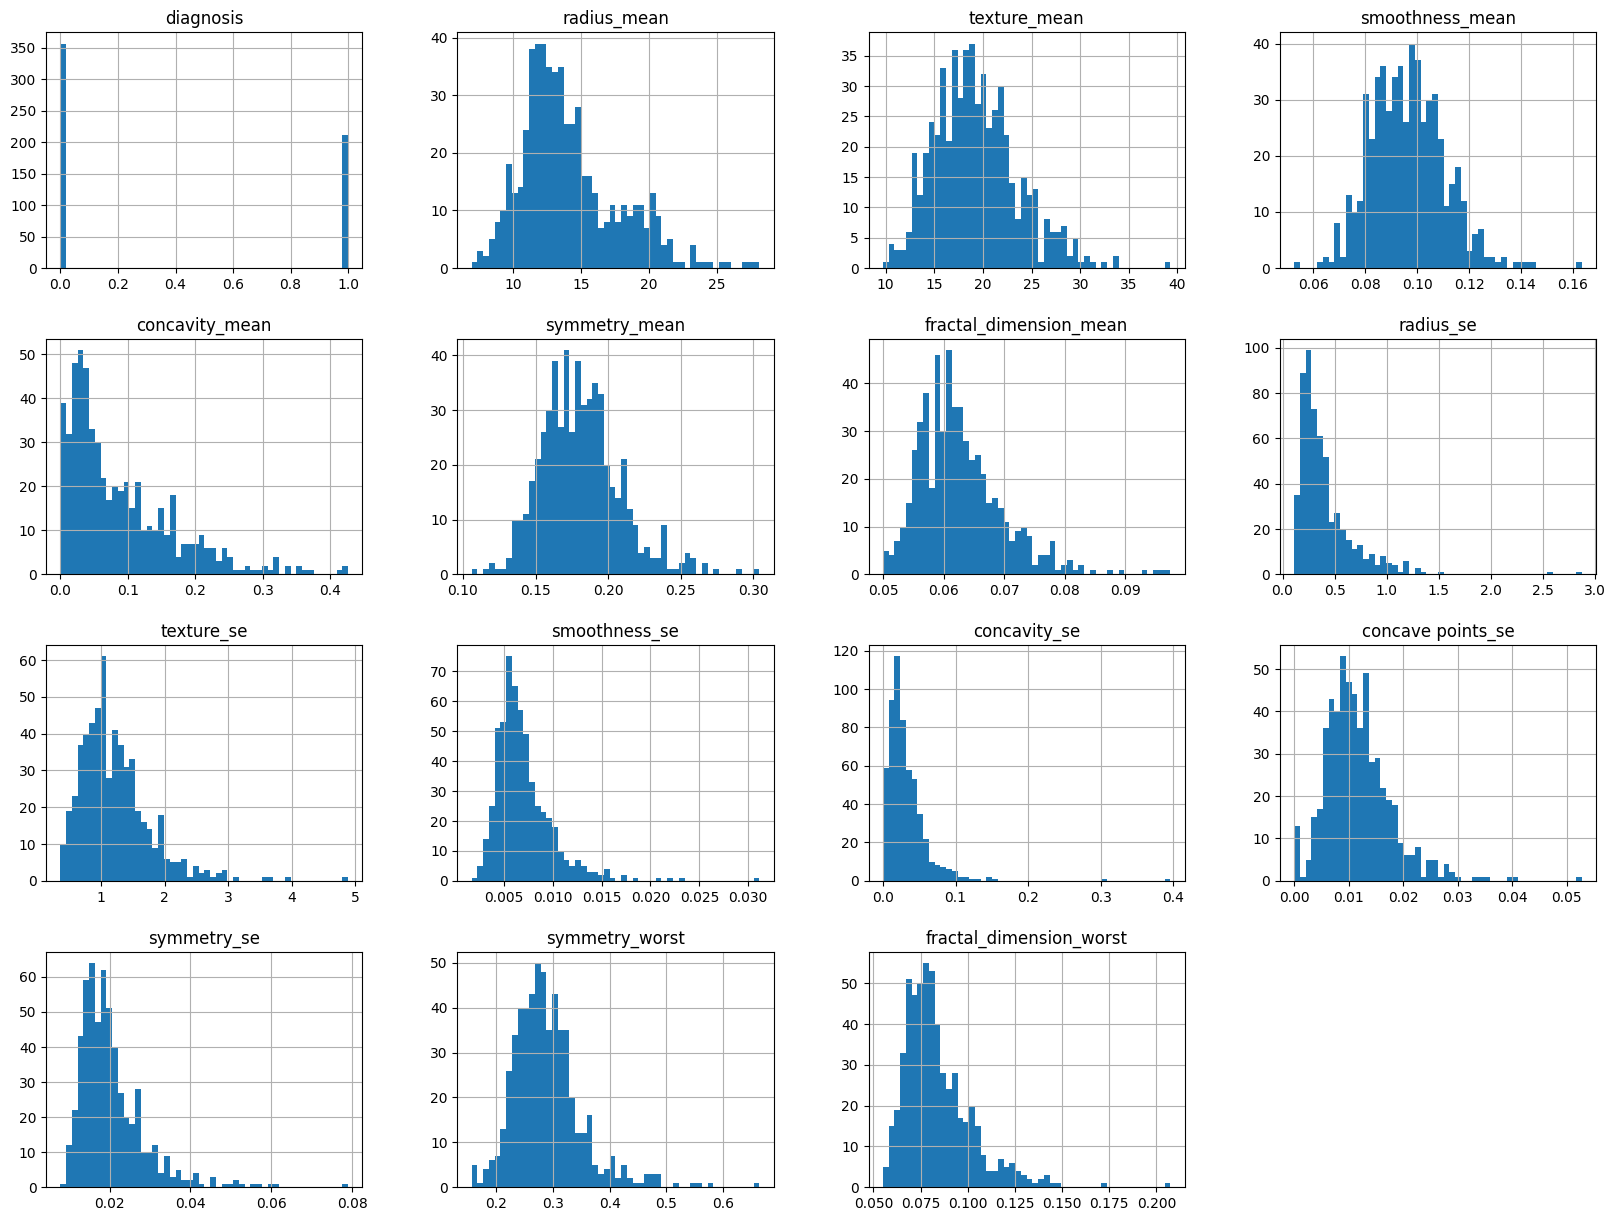

In [47]:
df.hist(bins=50, figsize=(20,15))

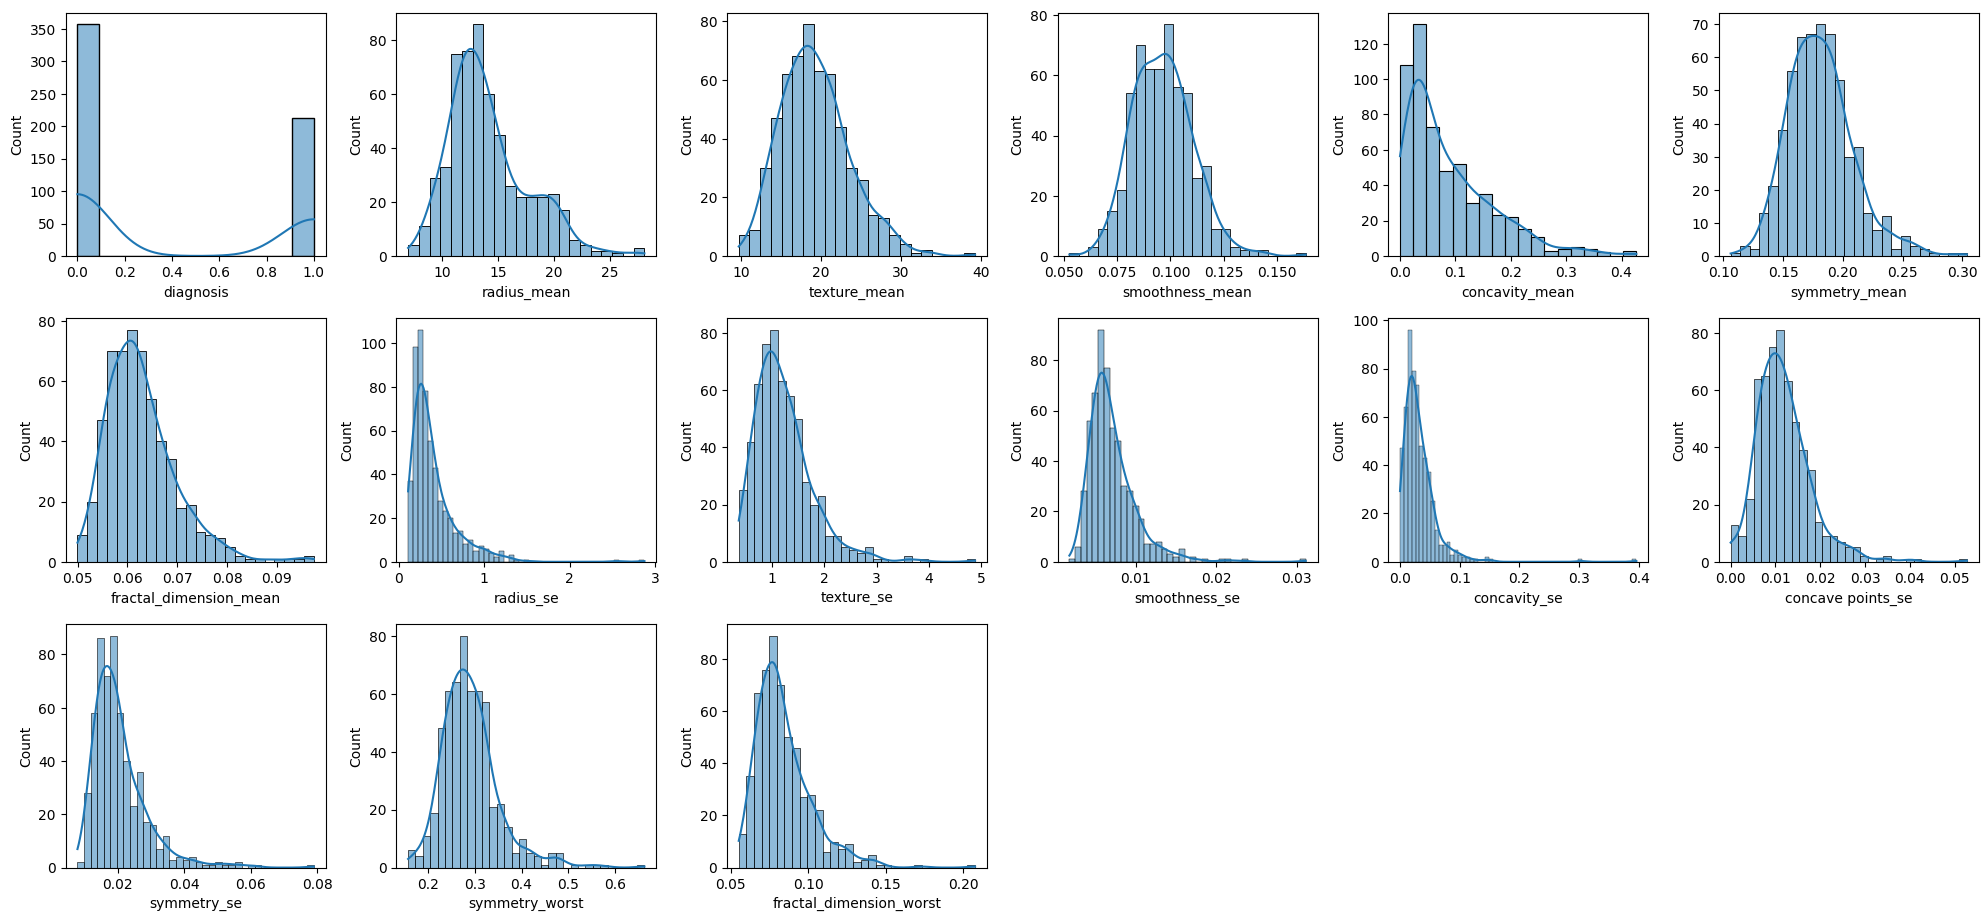

In [48]:
plt.figure(figsize=(20, 15))

# Initialize the plot number
plotnumber = 1

# Loop through each column in the DataFrame and create a histogram
for column in df:
    if plotnumber <= 30:  # Assuming you have up to 30 columns
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column], kde=True)  # Use histplot instead of distplot
        plt.xlabel(column)
    plotnumber += 1

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In the meanwhile lets look at plots when we know what the diagnoses are.

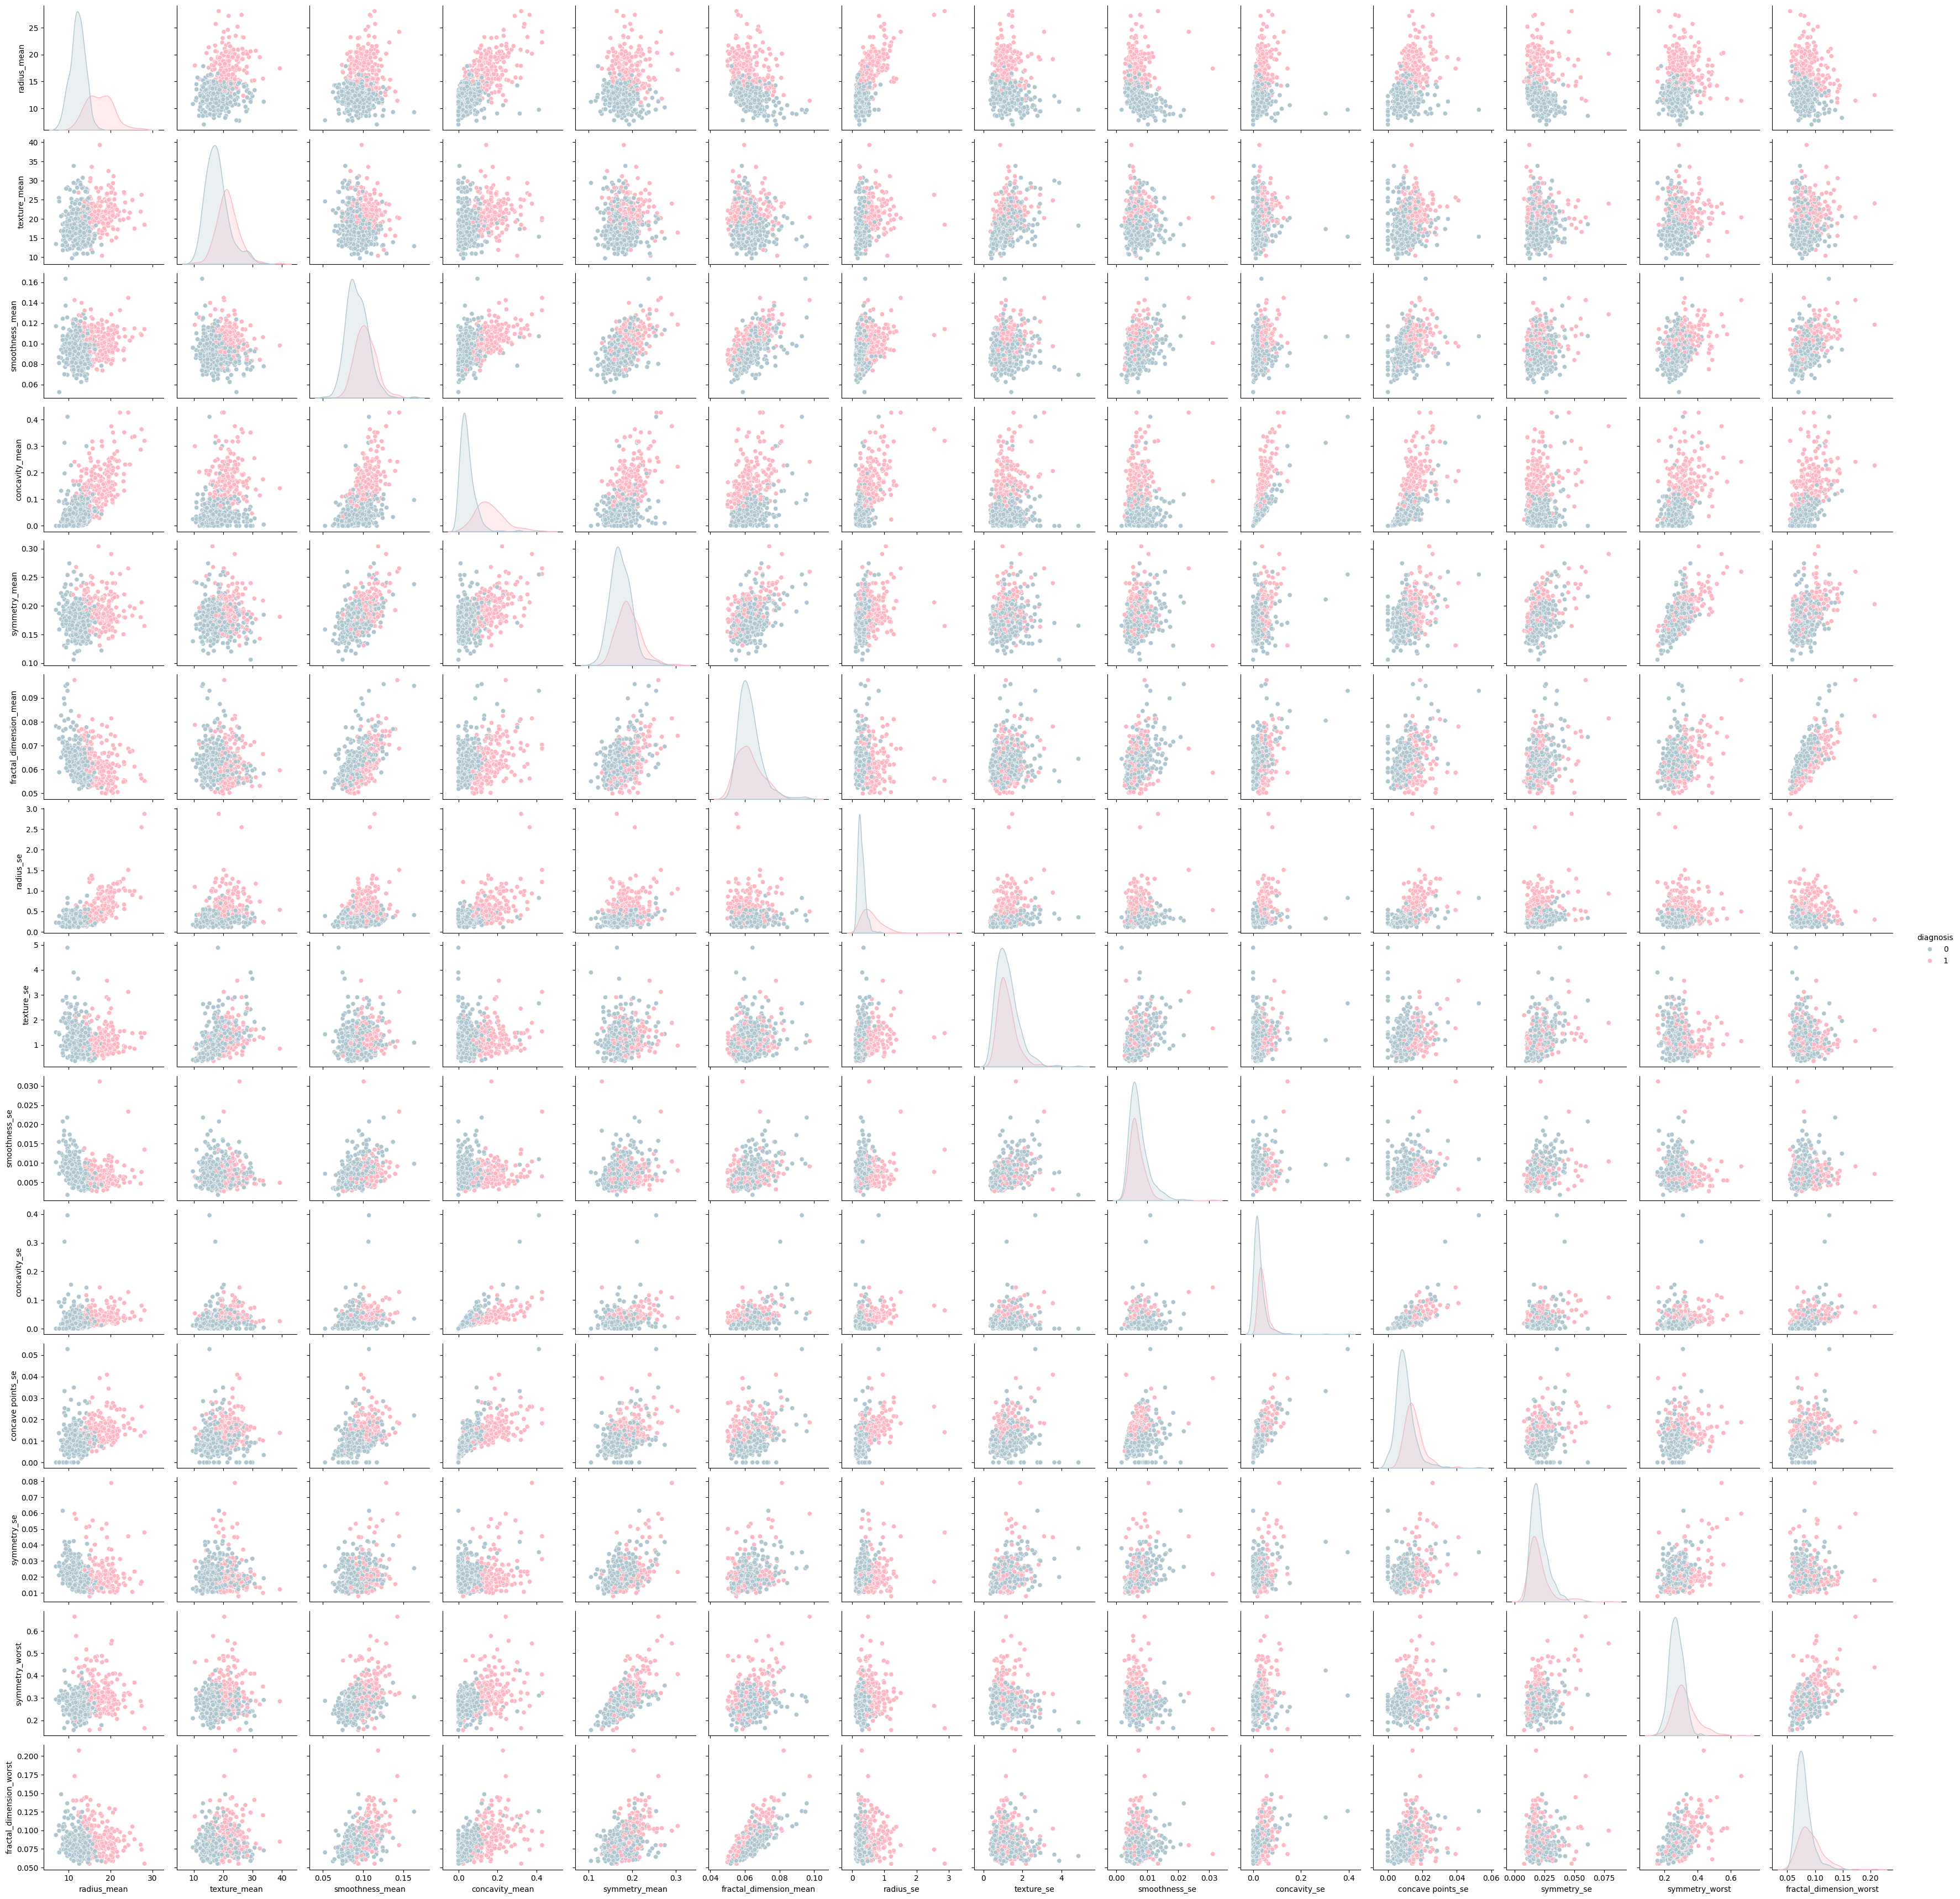

<Figure size 2800x2800 with 0 Axes>

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with only the selected columns and the 'diagnosis' column
new_df_with_diagnosis = df.copy()
new_df_with_diagnosis['diagnosis'] = df['diagnosis']

# Create a pairplot with the 'diagnosis' column as the hue
sns.pairplot(new_df_with_diagnosis, hue='diagnosis', palette={0: '#AEC6CF', 1: '#FFB6C1'})

# Adjust the figure size
plt.figure(figsize=(4*7, 7*4))
plt.show()

In [50]:
"""
# Filter out features with VIF greater than 10
features_to_keep = vif_data[vif_data['VIF'] <= 10]['feature']

# Update the dataframe
df_reduced = df[features_to_keep]
df_reduced
"""

"\n# Filter out features with VIF greater than 10\nfeatures_to_keep = vif_data[vif_data['VIF'] <= 10]['feature']\n\n# Update the dataframe\ndf_reduced = df[features_to_keep]\ndf_reduced\n"

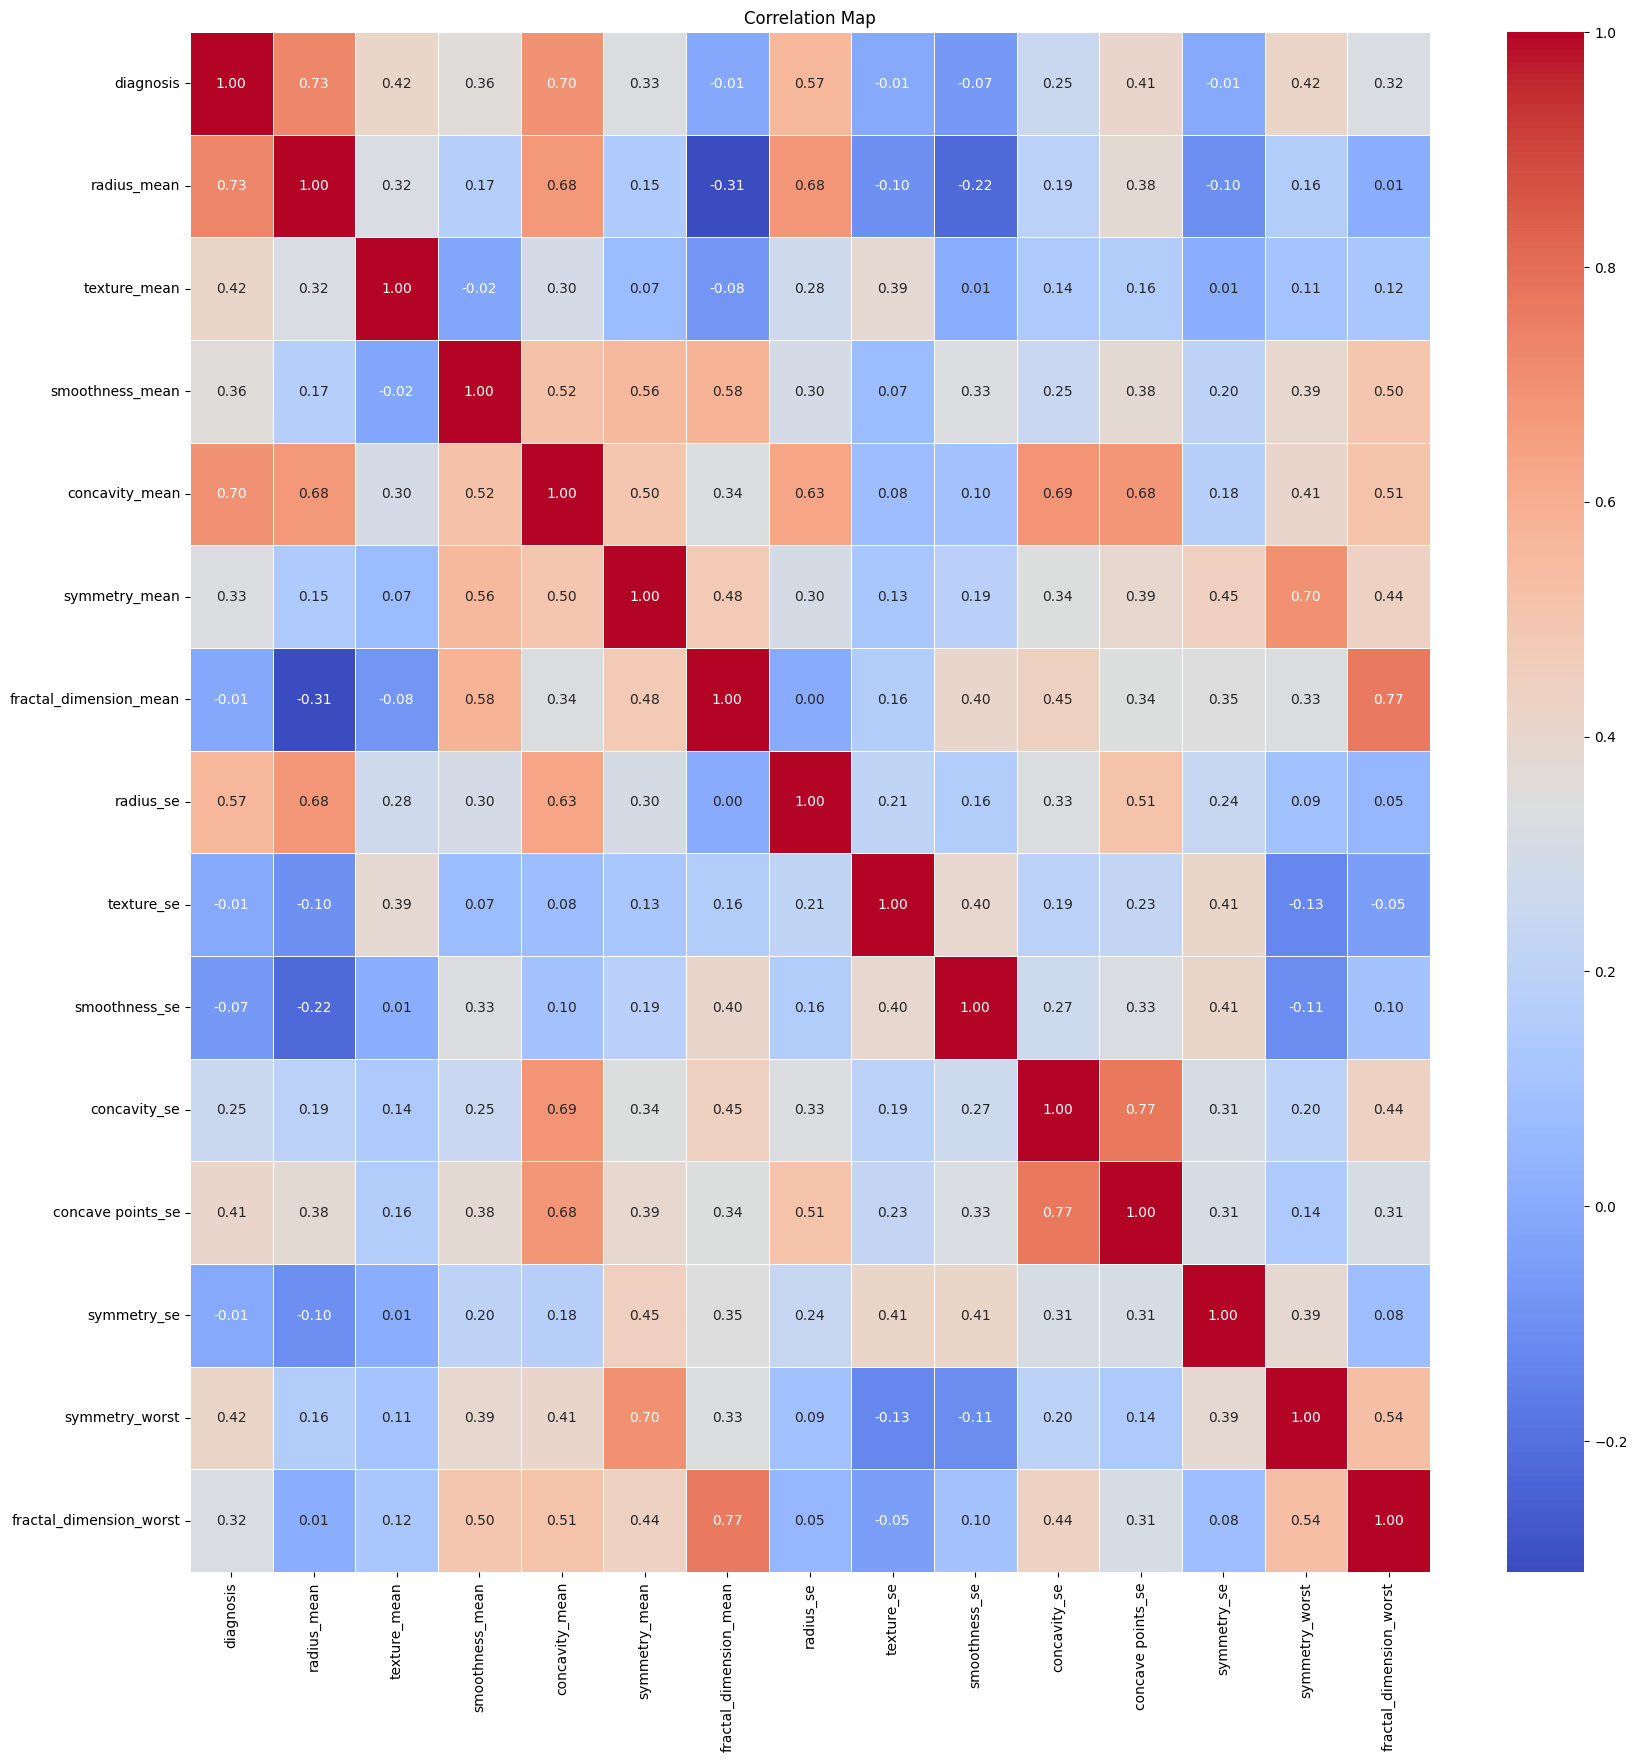

In [51]:
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), cmap="coolwarm", annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## Most suitable pairs:

To find which pairs will help us and which pairs won't we can use Mann-Whitney U Test to help us.

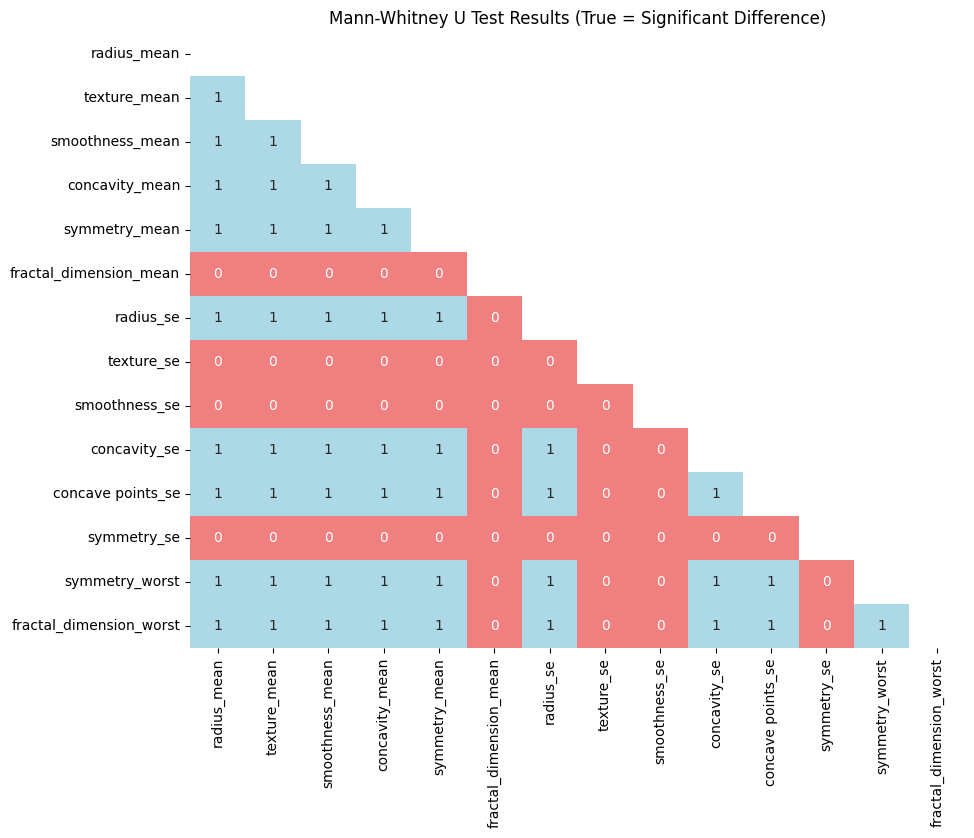

In [52]:
# Assuming df is your dataframe and 'diagnosis' is the column with 0 and 1 values
features = df.columns.drop('diagnosis')
num_features = len(features)

# Initialize a matrix to store the test results
test_result_matrix = np.full((num_features, num_features), np.nan)

# Set the significance level (alpha)
alpha = 0.0000001

# Loop through all pairs of features below the diagonal
for i in range(num_features):
    for j in range(i):
        feature_x = features[i]
        feature_y = features[j]

        # Separate the data into two groups based on the diagnosis
        group_0_x = df[df['diagnosis'] == 0][feature_x]
        group_1_x = df[df['diagnosis'] == 1][feature_x]
        group_0_y = df[df['diagnosis'] == 0][feature_y]
        group_1_y = df[df['diagnosis'] == 1][feature_y]

        # Perform Mann-Whitney U Test for both features
        _, p_value_x = mannwhitneyu(group_0_x, group_1_x)
        _, p_value_y = mannwhitneyu(group_0_y, group_1_y)

        # Combine the p-values to get a measure for separation
        p_value_combined = (p_value_x + p_value_y) / 2

        # Check if the combined p-value is below the significance level
        test_result = p_value_combined < alpha

        # Store the test result (True/False) in the matrix
        test_result_matrix[i, j] = test_result

# Convert the result matrix to a DataFrame for better readability
test_result_df = pd.DataFrame(test_result_matrix, index=features, columns=features)

# Set up the figure and the color palette
plt.figure(figsize=(10, 8))
sns.heatmap(test_result_df, annot=True, cmap=sns.color_palette(["lightcoral", "lightblue"]), cbar=False)

# Set labels and title
plt.title('Mann-Whitney U Test Results (True = Significant Difference)')
plt.show()

# Categorizing by Regression

We want to split the data using the diagnosis column,

We will build a function that uses the important connections between the columns to determimt what the diagnosis is.

We showed many ways to classify the data, we will use SVM in order to make a seperation between the benign to melignant diagnostics.

we will train for each pair who passed the U-test a SVM model to seperate the diagnosis

In [53]:
# Split the data
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store SVM models with accuracy >= 0.85
svm_models = {}

# Features in the dataset (excluding 'diagnosis')
features = X.columns
num_features = len(features)

# Loop through the matrix to find pairs with significant difference (where test_result_df is 1)
for i in range(num_features):
    for j in range(i):
        if test_result_df.iloc[i, j]:  # If the test result is 1 (significant)
            feature_x = features[i]
            feature_y = features[j]

            # Prepare the data for SVM
            X_train_pair = X_train[[feature_x, feature_y]]
            y_train_pair = y_train

            # Train the SVM model
            svm_model = SVC(kernel='linear', random_state=42)
            svm_model.fit(X_train_pair, y_train_pair)

            # Test the model on the training set
            y_pred_train = svm_model.predict(X_train_pair)
            accuracy = accuracy_score(y_train_pair, y_pred_train)

            # Only store the model if the accuracy is >= 0.85
            if accuracy >= 0.85:
                svm_models[(feature_x, feature_y)] = svm_model

# Function to predict the mean result from all models
def mean_prediction_from_models(input_vector, models, feature_names):
    predictions = []

    # Ensure the input vector is a Series to retain feature names
    input_vector = pd.Series(input_vector, index=feature_names)

    for (feature_x, feature_y), model in models.items():
        # Select the relevant features for the current model
        input_pair = input_vector[[feature_x, feature_y]].to_frame().T  # Convert to DataFrame to retain feature names

        # Make a prediction using the current model
        prediction = model.predict(input_pair)[0]
        predictions.append(prediction)

    # Calculate the mean of all predictions
    mean_prediction = np.mean(predictions)
    return mean_prediction

# Test the accuracy using the test set
true_labels = y_test
predictions = []

# Iterate over each sample in the test set
for _, row in X_test.iterrows():
    # Convert row to Series with the correct feature names
    input_vector = pd.Series(row.values, index=X_train.columns)
    mean_pred = mean_prediction_from_models(input_vector, svm_models, X_train.columns)

    # Convert mean prediction to binary label (threshold at 0.5)
    predicted_label = 1 if mean_pred >= 0.5 else 0
    predictions.append(predicted_label)

# Compute the accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Final Model Accuracy: {accuracy:.4f}")

Final Model Accuracy: 0.9181


We got Final Model Accuracy: 0.9181, sufficient for us!

In [54]:
### List of all the models with accuracy over 0.85:

In [55]:
# Assuming df and test_result_df are already defined
features = df.columns.drop('diagnosis')
num_features = len(features)

# Dictionary to store SVM models with accuracy >= 0.85
svm_models = {}

# Loop through the matrix to find pairs with 'True' (significant difference)
for i in range(num_features):
    for j in range(i):
        if test_result_df.iloc[i, j]:  # If the test result is True (significant)
            feature_x = features[i]
            feature_y = features[j]

            # Prepare the data for SVM
            X = df[[feature_x, feature_y]]
            y = df['diagnosis']

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

            # Train the SVM model
            svm_model = SVC(kernel='linear', random_state=42)
            svm_model.fit(X_train, y_train)

            # Test the model and calculate accuracy
            y_pred = svm_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Only store the model if the accuracy is >= 0.85
            if accuracy >= 0.85:
                svm_models[(feature_x, feature_y)] = svm_model
                print(f'SVM model for {feature_x} and {feature_y} - Accuracy: {accuracy:.4f}')

SVM model for texture_mean and radius_mean - Accuracy: 0.9064
SVM model for smoothness_mean and radius_mean - Accuracy: 0.9181
SVM model for concavity_mean and radius_mean - Accuracy: 0.9240
SVM model for concavity_mean and texture_mean - Accuracy: 0.8713
SVM model for concavity_mean and smoothness_mean - Accuracy: 0.8538
SVM model for symmetry_mean and radius_mean - Accuracy: 0.9181
SVM model for symmetry_mean and concavity_mean - Accuracy: 0.8538
SVM model for radius_se and radius_mean - Accuracy: 0.9064
SVM model for radius_se and concavity_mean - Accuracy: 0.8596
SVM model for concavity_se and radius_mean - Accuracy: 0.9181
SVM model for concave points_se and radius_mean - Accuracy: 0.9181
SVM model for concave points_se and concavity_mean - Accuracy: 0.8538
SVM model for symmetry_worst and radius_mean - Accuracy: 0.9357
SVM model for fractal_dimension_worst and radius_mean - Accuracy: 0.9181


let's see some visual examples

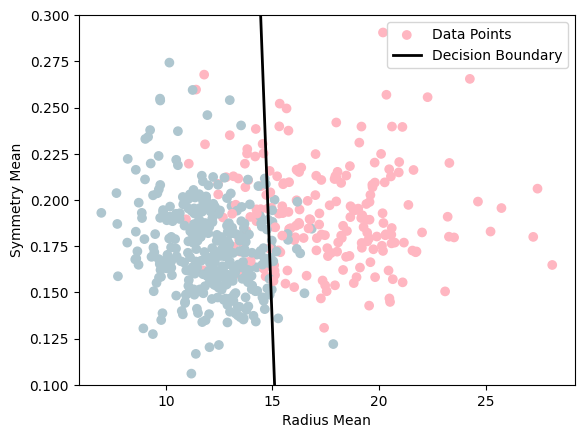

In [56]:
X = df[['radius_mean', 'symmetry_mean']]
Y = df['diagnosis']

# Create an SVM model with a linear kernel
model1 = SVC(kernel='linear')
model1.fit(X, Y)

# Get the coefficients and intercept from the trained SVM model
coefficients_1 = model1.coef_[0]
intercept_1 = model1.intercept_[0]

# Scatter plot with colors
colors = {0: '#AEC6CF', 1: '#FFB6C1'}
scatter = plt.scatter(df['radius_mean'], df['symmetry_mean'], c=df['diagnosis'].map(colors), label='Data Points')

# Plot the first decision boundary line
x1_values = np.linspace(df['radius_mean'].min(), df['radius_mean'].max(), 100)
y1_values = (-coefficients_1[0] * x1_values - intercept_1) / coefficients_1[1]

# Plot the SVM decision boundary line
plt.plot(x1_values, y1_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary')

plt.ylim(0.1, 0.3)

# Add labels, title, and legend
plt.xlabel('Radius Mean')
plt.ylabel('Symmetry Mean')
plt.legend()
plt.show()

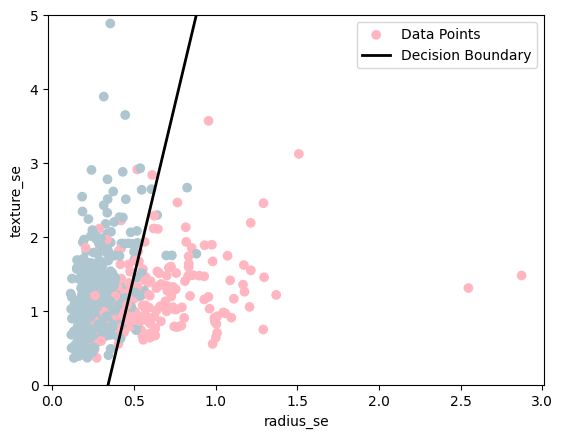

In [57]:
X = df[['radius_se', 'texture_se']]
Y = df['diagnosis']

# Create an SVM model with a linear kernel
model2 = SVC(kernel='linear')
model2.fit(X, Y)

# Get the coefficients and intercept from the trained SVM model
coefficients_2 = model2.coef_[0]
intercept_2 = model2.intercept_[0]

# Scatter plot with colors and labels
colors = {0: '#AEC6CF', 1: '#FFB6C1'}
scatter = plt.scatter(df['radius_se'], df['texture_se'], c=df['diagnosis'].map(colors), label='Data Points')

# Plot the decision boundary line
x2_values = np.linspace(df['radius_se'].min(), df['radius_se'].max(), 100)
y2_values = (-coefficients_2[0] * x2_values - intercept_2) / coefficients_2[1]

# Plot the SVM decision boundary line with label
plt.plot(x2_values, y2_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary')

plt.ylim(0, 5)

# Add labels, title, and legend
plt.xlabel('radius_se')
plt.ylabel('texture_se')
plt.legend()
plt.show()

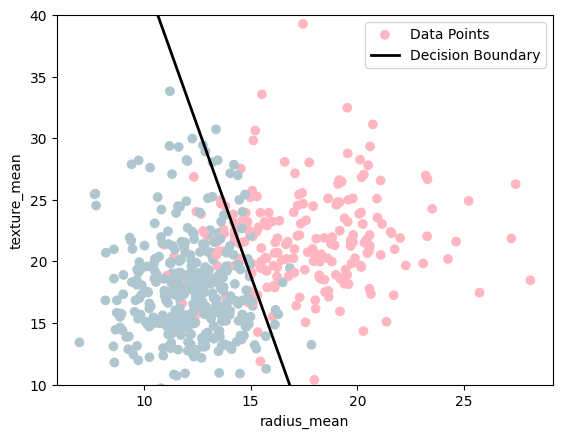

In [58]:
X = df[['radius_mean', 'texture_mean']]
Y = df['diagnosis']

# Create an SVM model with a linear kernel
model3 = SVC(kernel='linear')
model3.fit(X, Y)

# Get the coefficients and intercept from the trained SVM model
coefficients_3 = model3.coef_[0]
intercept_3 = model3.intercept_[0]

# Scatter plot with colors and labels
colors = {0: '#AEC6CF', 1: '#FFB6C1'}
scatter = plt.scatter(df['radius_mean'], df['texture_mean'], c=df['diagnosis'].map(colors), label='Data Points')

# Plot the decision boundary line
x3_values = np.linspace(df['radius_mean'].min(), df['radius_mean'].max(), 100)
y3_values = (-coefficients_3[0] * x3_values - intercept_3) / coefficients_3[1]

# Plot the SVM decision boundary line with label
plt.plot(x3_values, y3_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary')

plt.ylim(10, 40)

# Add labels, title, and legend
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend()
plt.show()

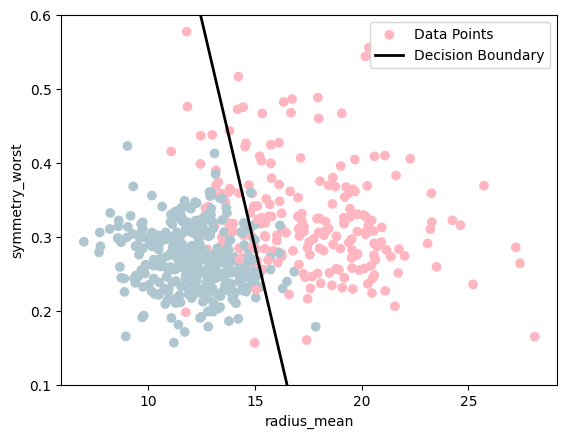

In [59]:
X = df[['radius_mean', 'symmetry_worst']]
Y = df['diagnosis']

# Create an SVM model with a linear kernel
model4 = SVC(kernel='linear')
model4.fit(X, Y)

# Get the coefficients and intercept from the trained SVM model
coefficients_4 = model4.coef_[0]
intercept_4 = model4.intercept_[0]

# Scatter plot with colors and labels
colors = {0: '#AEC6CF', 1: '#FFB6C1'}
scatter = plt.scatter(df['radius_mean'], df['symmetry_worst'], c=df['diagnosis'].map(colors), label='Data Points')

# Plot the decision boundary line
x4_values = np.linspace(df['radius_mean'].min(), df['radius_mean'].max(), 100)
y4_values = (-coefficients_4[0] * x4_values - intercept_4) / coefficients_4[1]

# Plot the SVM decision boundary line with label
plt.plot(x4_values, y4_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary')

plt.ylim(0.1, 0.6)

# Add labels, title, and legend
plt.xlabel('radius_mean')
plt.ylabel('symmetry_worst')
plt.legend()
plt.show()

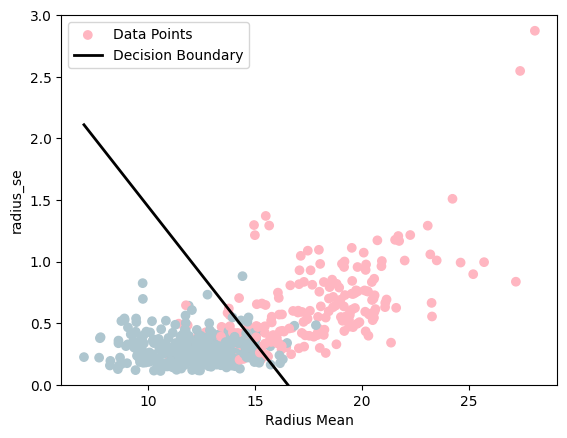

In [60]:
X = df[['radius_mean', 'radius_se']]
Y = df['diagnosis']

# Create an SVM model with a linear kernel
model5 = SVC(kernel='linear')
model5.fit(X, Y)

# Get the coefficients and intercept from the trained SVM model
coefficients_5 = model5.coef_[0]
intercept_5 = model5.intercept_[0]

# Scatter plot with colors and labels
colors = {0: '#AEC6CF', 1: '#FFB6C1'}
scatter = plt.scatter(df['radius_mean'], df['radius_se'], c=df['diagnosis'].map(colors), label='Data Points')

# Plot the decision boundary line
x5_values = np.linspace(df['radius_mean'].min(), df['radius_mean'].max(), 100)
y5_values = (-coefficients_5[0] * x5_values - intercept_5) / coefficients_5[1]

# Plot the SVM decision boundary line with label
plt.plot(x5_values, y5_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary')

plt.ylim(0, 3)

# Add labels, title, and legend
plt.xlabel('Radius Mean')
plt.ylabel('radius_se')
plt.legend()
plt.show()

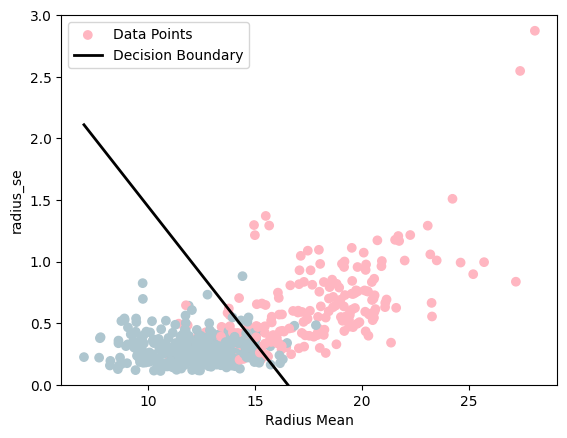

In [61]:
X = df[['radius_mean', 'radius_se']]
Y = df['diagnosis']

# Create an SVM model with a linear kernel
model5 = SVC(kernel='linear')
model5.fit(X, Y)

# Get the coefficients and intercept from the trained SVM model
coefficients_5 = model5.coef_[0]
intercept_5 = model5.intercept_[0]

# Scatter plot with colors and labels
colors = {0: '#AEC6CF', 1: '#FFB6C1'}
scatter = plt.scatter(df['radius_mean'], df['radius_se'], c=df['diagnosis'].map(colors), label='Data Points')

# Plot the decision boundary line
x5_values = np.linspace(df['radius_mean'].min(), df['radius_mean'].max(), 100)
y5_values = (-coefficients_5[0] * x5_values - intercept_5) / coefficients_5[1]

# Plot the SVM decision boundary line with label
plt.plot(x5_values, y5_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary')

plt.ylim(0, 3)

# Add labels, title, and legend
plt.xlabel('Radius Mean')
plt.ylabel('radius_se')
plt.legend()
plt.show()

# Combininng DataSets
* we are trying to figure out what conributions socio econimical state has on breast cancer

In [62]:
Codata1 = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/statistical-theory/main/Cancer%20Deaths%20by%20Country%20and%20Type%20Dataset.csv')
Codata1

Country Code  Year  Liver cancer   Kidney cancer   Larynx cancer   \
0     Afghanistan  AFG  1990     243.663716       39.470495      109.334207   
1     Afghanistan  AFG  1991     261.241824       41.376024      117.311719   
2     Afghanistan  AFG  1992     284.443630       44.106315      128.071634   
3     Afghanistan  AFG  1993     313.136816       47.424854      141.429604   
4     Afghanistan  AFG  1994     343.229715       50.710951      155.754606   
...           ...  ...   ...            ...             ...             ...   
5989     Zimbabwe  ZWE  2012    1218.763107       56.966136      162.131298   
5990     Zimbabwe  ZWE  2013    1252.747896       58.735014      161.039807   
5991     Zimbabwe  ZWE  2014    1308.483454       61.575167      161.512234   
5992     Zimbabwe  ZWE  2015    1357.611713       63.757395      162.909299   
5993     Zimbabwe  ZWE  2016    1411.242274       66.764985      164.929997   

      Breast cancer   Thyroid cancer   Stomach cancer   Bladder cancer   ...  \
0         766.535431        79.820167       923.495208       148.139204  ...   
1         823.233932        85.111020       989.709648       156.977412  ...   
2         901.022100        92.240603      1078.459037       168.990462  ...   
3         996.432762       101.206726      1192.064525       184.347737  ...   
4        1097.895223       110.679923      1316.505674       200.246949  ...   
...              ...              ...              ...              ...  ...   
5989      783.959361       115.203608       936.013607       420.658042  ...   
5990      790.077464       115.846418       928.096553       423.397684  ...   
5991      839.938132       121.251540       949.321368       434.314706  ...   
5992      862.707637       123.638675       956.138239       442.122976  ...   
5993      891.630167       126.800977       969.794783       453.711001  ...   

      Non-melanoma skin cancer   Lip and oral cavity cancer   \
0                     26.446156                    53.599636   
1                     28.275271                    57.148890   
2                     30.718152                    61.876100   
3                     33.835442                    67.504857   
4                     37.103370                    73.175879   
...                         ...                          ...   
5989                 212.201798                    95.507275   
5990                 213.262823                    97.058488   
5991                 215.100202                    99.866860   
5992                 218.011570                   102.734862   
5993                 222.509943                   106.303546   

      Brain and nervous system cancer   Tracheal, bronchus, and lung cancer   \
0                           163.869062                            797.265710   
1                           174.183219                            853.126362   
2                           188.382296                            927.812846   
3                           205.250430                           1017.964700   
4                           222.383572                           1110.997186   
...                                ...                                   ...   
5989                        222.048414                            729.985667   
5990                        229.271375                            728.931891   
5991                        240.975514                            733.693373   
5992                        250.586202                            741.287816   
5993                        263.215193                            752.224915   

      Gallbladder and biliary tract cancer   Malignant skin melanoma   \
0                                125.936240                 14.293978   
1                                133.781377                 15.241048   
2                                144.287648                 16.508833   
3                                157.471005                 18.038507   
4    

In [63]:
# Removing trailing spaces from the column names
Codata1.columns = Codata1.columns.str.strip()

# Select the specified columns again after removing trailing spaces
Codata1_selected = Codata1[['Country', 'Code', 'Year', 'Breast cancer']]

# Display the first few rows of the selected DataFrame
Codata1_selected

Country Code  Year  Breast cancer
0     Afghanistan  AFG  1990     766.535431
1     Afghanistan  AFG  1991     823.233932
2     Afghanistan  AFG  1992     901.022100
3     Afghanistan  AFG  1993     996.432762
4     Afghanistan  AFG  1994    1097.895223
...           ...  ...   ...            ...
5989     Zimbabwe  ZWE  2012     783.959361
5990     Zimbabwe  ZWE  2013     790.077464
5991     Zimbabwe  ZWE  2014     839.938132
5992     Zimbabwe  ZWE  2015     862.707637
5993     Zimbabwe  ZWE  2016     891.630167

[5994 rows x 4 columns]

In [64]:
# List of countries to filter
countries_to_filter = [
    "Canada", "Chile", "Colombia", "Costa Rica", "Guatemala", "Bahamas",
    "Ecuador", "El Salvador", "Mexico", "Honduras"
]

# Filter the DataFrame for the specified countries
Codata1_filtered = Codata1_selected[Codata1_selected['Country'].isin(countries_to_filter)]

# Display the first few rows of the filtered DataFrame
Codata1_filtered

Country Code  Year  Breast cancer
378   Bahamas  BHS  1990      26.962018
379   Bahamas  BHS  1991      27.808558
380   Bahamas  BHS  1992      28.811027
381   Bahamas  BHS  1993      30.021995
382   Bahamas  BHS  1994      30.787088
...       ...  ...   ...            ...
3370   Mexico  MEX  2012    5998.797400
3371   Mexico  MEX  2013    6335.127044
3372   Mexico  MEX  2014    6610.387303
3373   Mexico  MEX  2015    6695.789585
3374   Mexico  MEX  2016    6848.454072

[270 rows x 4 columns]

In [65]:
# Filter the DataFrame for the year 1992
Codata1_filtered_year = Codata1_filtered[Codata1_filtered['Year'] == 1992]

# Display the first few rows of the filtered DataFrame
Codata1_filtered_year

Country Code  Year  Breast cancer
380       Bahamas  BHS  1992      28.811027
920        Canada  CAN  1992    4952.458943
1163        Chile  CHL  1992     841.069976
1217     Colombia  COL  1992    1615.615711
1298   Costa Rica  CRI  1992     161.836578
1676      Ecuador  ECU  1992     295.522830
1730  El Salvador  SLV  1992     164.064214
2216    Guatemala  GTM  1992     197.725307
2351     Honduras  HND  1992     125.483079
3350       Mexico  MEX  1992    2962.225256

## how many breast cancer death occured in wisconsin in 1992
### [wisconsin](https://www.cdc.gov/mmwr/preview/mmwrhtml/00043942.htm)

In [66]:
# Define the new row data for Wisconsin in cancer deaths dataset
new_cancer_row = {'Country': 'Wisconsin', 'Code': 'WIS', 'Year': 1992, 'Breast cancer': 4455}

# Create a DataFrame for the new row
new_cancer_row_df = pd.DataFrame([new_cancer_row])

# Append the new row to the cancer deaths DataFrame using pd.concat
Cancer = pd.concat([Codata1_filtered_year, new_cancer_row_df], ignore_index=True)
Cancer

Country Code  Year  Breast cancer
0       Bahamas  BHS  1992      28.811027
1        Canada  CAN  1992    4952.458943
2         Chile  CHL  1992     841.069976
3      Colombia  COL  1992    1615.615711
4    Costa Rica  CRI  1992     161.836578
5       Ecuador  ECU  1992     295.522830
6   El Salvador  SLV  1992     164.064214
7     Guatemala  GTM  1992     197.725307
8      Honduras  HND  1992     125.483079
9        Mexico  MEX  1992    2962.225256
10    Wisconsin  WIS  1992    4455.000000

cancer is the dataset of the number of breast cancer events in each state in 1992

In [67]:
gdp1 = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/statistical-theory/main/Countries%20GDP%201960-2020.csv')
gdp1

Country Name Country Code          1960          1961  \
0       Africa Eastern and Southern          AFE  1.931311e+10  1.972349e+10   
1        Africa Western and Central          AFW  1.040428e+10  1.112805e+10   
2                         Australia          AUS  1.860679e+10  1.968306e+10   
3                           Austria          AUT  6.592694e+09  7.311750e+09   
4                           Burundi          BDI  1.960000e+08  2.030000e+08   
..                              ...          ...           ...           ...   
115  St. Vincent and the Grenadines          VCT  1.306656e+07  1.399988e+07   
116                           World          WLD  1.390000e+12  1.440000e+12   
117                    South Africa          ZAF  7.575397e+09  7.972997e+09   
118                          Zambia          ZMB  7.130000e+08  6.962857e+08   
119                        Zimbabwe          ZWE  1.052990e+09  1.096647e+09   

             1962          1963          1964          1965          1966  \
0    2.149392e+10  2.573321e+10  2.352744e+10  2.681057e+10  2.915216e+10   
1    1.194335e+10  1.267652e+10  1.383858e+10  1.486247e+10  1.583285e+10   
2    1.992272e+10  2.153993e+10  2.380110e+10  2.597715e+10  2.730989e+10   
3    7.756110e+09  8.374175e+09  9.169984e+09  9.994071e+09  1.088768e+10   
4    2.135000e+08  2.327500e+08  2.607500e+08  1.589950e+08  1.654446e+08   
..            ...           ...           ...           ...           ...   
115  1.452488e+07  1.370822e+07  1.475821e+07  1.510821e+07  1.609987e+07   
116  1.550000e+12  1.670000e+12  1.820000e+12  1.990000e+12  2.160000e+12   
117  8.497997e+09  9.423396e+09  1.037400e+10  1.133440e+10  1.235500e+10   
118  6.931429e+08  7.187143e+08  8.394286e+08  1.082857e+09  1.264286e+09   
119  1.117602e+09  1.159512e+09  1.217138e+09  1.311436e+09  1.281750e+09   

             1967  ...          2011          2012          2013  \
0    3.017317e+10  ...  9.430000e+11  9.510000e+11  9.640000e+11   
1    1.442643e+10  ...  6.710000e+11  7.280000e+11  8.210000e+11   
2    3.044462e+10  ...  1.400000e+12  1.550000e+12  1.580000e+12   
3    1.157943e+10  ...  4.310000e+11  4.090000e+11  4.300000e+11   
4    1.782971e+08  ...  2.235821e+09  2.333308e+09  2.451625e+09   
..            ...  ...           ...           ...           ...   
115  1.583518e+07  ...  6.761296e+08  6.929333e+08  7.212074e+08   
116  2.290000e+12  ...  7.370000e+13  7.530000e+13  7.740000e+13   
117  1.377739e+10  ...  4.580000e+11  4.340000e+11  4.010000e+11   
118  1.368000e+09  ...  2.345952e+10  2.550306e+10  2.803724e+10   
119  1.397002e+09  ...  1.410192e+10  1.711485e+10  1.909102e+10   

             2014          2015          2016          2017          2018  \
0    9.850000e+11  9.200000e+11  8.730000e+11  9.850000e+11  1.010000e+12   
1    8.650000e+11  7.610000e+11  6.910000e+11  6.840000e+11  7.420000e+11   
2    1.470000e+12  1.350000e+12  1.210000e+12  1.330000e+12  1.430000e+12   
3    4.420000e+11  3.820000e+11  3.960000e+11  4.160000e+11  4.550000e+11   
4    2.705783e+09  3.104395e+09  2.732809e+09  2.748180e+09  2.668496e+09   
..            ...           ...           ...           ...           ...   
115  7.277148e+08  7.554000e+08  7.744296e+08  7.921778e+08  8.113000e+08   
116  7.960000e+13  7.510000e+13  7.630000e+13  8.120000e+13  8.630000e+13   
117  3.810000e+11  3.470000e+11  3.240000e+11  3.810000e+11  4.050000e+11   
118  2.714102e+10  2.125122e+10  2.095841e+10  2.587360e+10  2.631159e+10   
119  1.949552e+10  1.996312e+10  2.054868e+10  1.758489e+10  1.811554e+10   

             2019          2020  
0    1.010000e+12  9.210000e+11  
1    7.950000e+11  7.850000e+11  
2    1.390000e+12  1.330000e+12  
3    4.450000e+11  4.330000e+11  
4    2.631434e+09  2.841786e+09  
..            ...           ...  
115  8.250407e+08  8.074741e+08  
116  8.760000e+13  8.470000e+13  
117  3.880000e+11  3.350000e+11  
118  2.330867e+10  1.811063e+10  
119  1.928429e+10  1.

In [68]:
countries_to_filter = [
    "Canada", "Chile", "Colombia", "Costa Rica", "Guatemala", "Bahamas",
    "Ecuador", "El Salvador", "Mexico", "Honduras", "Bahamas, The"
]

# Filter the DataFrame for the specified countries
gdp1_filtered = gdp1[gdp1['Country Name'].isin(countries_to_filter)]

# Select the specified columns
gdp1_filtered = gdp1_filtered[['Country Name', 'Country Code', '1992']]
gdp1_filtered

Country Name Country Code          1992
9   Bahamas, The          BHS  3.109000e+09
15        Canada          CAN  5.920000e+11
16         Chile          CHL  4.596433e+10
22      Colombia          COL  5.841899e+10
23    Costa Rica          CRI  8.564044e+09
30       Ecuador          ECU  1.809424e+10
40     Guatemala          GTM  1.044084e+10
44      Honduras          HND  4.943700e+09
69        Mexico          MEX  3.630000e+11

In [69]:
gdp2 = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/statistical-theory/main/gdp.csv')
gdp2

Country Name Code          1960          1961  \
0                          Aruba  ABW           NaN           NaN   
1    Africa Eastern and Southern  AFE  1.931311e+10  1.972349e+10   
2                    Afghanistan  AFG  5.377778e+08  5.488889e+08   
3     Africa Western and Central  AFW  1.040428e+10  1.112805e+10   
4                         Angola  AGO           NaN           NaN   
..                           ...  ...           ...           ...   
261                       Kosovo  XKX           NaN           NaN   
262                  Yemen, Rep.  YEM           NaN           NaN   
263                 South Africa  ZAF  7.575397e+09  7.972997e+09   
264                       Zambia  ZMB  7.130000e+08  6.962857e+08   
265                     Zimbabwe  ZWE  1.052990e+09  1.096647e+09   

             1962          1963          1964          1965          1966  \
0             NaN           NaN           NaN           NaN           NaN   
1    2.149392e+10  2.573321e+10  2.352744e+10  2.681057e+10  2.915216e+10   
2    5.466667e+08  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09   
3    1.194335e+10  1.267652e+10  1.383858e+10  1.486247e+10  1.583285e+10   
4             NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
261           NaN           NaN           NaN           NaN           NaN   
262           NaN           NaN           NaN           NaN           NaN   
263  8.497997e+09  9.423396e+09  1.037400e+10  1.133440e+10  1.235500e+10   
264  6.931429e+08  7.187143e+08  8.394286e+08  1.082857e+09  1.264286e+09   
265  1.117602e+09  1.159512e+09  1.217138e+09  1.311436e+09  1.281750e+09   

             1967  ...          2012          2013          2014  \
0             NaN  ...  2.534637e+09  2.727850e+09  2.790849e+09   
1    3.017317e+10  ...  9.505214e+11  9.642424e+11  9.848071e+11   
2    1.673333e+09  ...  1.990732e+10  2.014640e+10  2.049713e+10   
3    1.442643e+10  ...  7.275714e+11  8.207876e+11  8.649666e+11   
4             NaN  ...  1.280529e+11  1.367099e+11  1.457122e+11   
..            ...  ...           ...           ...           ...   
261           NaN  ...  6.163785e+09  6.735731e+09  7.074658e+09   
262           NaN  ...  3.540134e+10  4.041524e+10  4.322859e+10   
263  1.377739e+10  ...  4.344005e+11  4.008860e+11  3.811989e+11   
264  1.368000e+09  ...  2.550306e+10  2.803724e+10  2.714102e+10   
265  1.397002e+09  ...  1.711485e+10  1.909102e+10  1.949552e+10   

             2015          2016          2017          2018          2019  \
0    2.962905e+09  2.983637e+09  3.092430e+09  3.202189e+09           NaN   
1    9.199300e+11  8.733549e+11  9.853557e+11  1.012853e+12  1.009910e+12   
2    1.913421e+10  1.811656e+10  1.875347e+10  1.805323e+10  1.879945e+10   
3    7.607297e+11  6.905430e+11  6.837416e+11  7.416916e+11  7.945725e+11   
4    1.161936e+11  1.011239e+11  1.221238e+11  1.013532e+11  8.941719e+10   
..            ...           ...           ...           ...           ...   
261  6.295820e+09  6.682833e+09  7.180813e+09  7.878509e+09  7.899879e+09   
262  4.244510e+10  3.131737e+10  2.684013e+10  2.160614e+10           NaN   
263  3.467098e+11  3.235855e+11  3.814488e+11  4.048421e+11  3.879346e+11   
264  2.125122e+10  2.095841e+10  2.587360e+10  2.631159e+10  2.330867e+10   
265  1.996312e+10  2.054868e+10  1.758489e+10  1.811554e+10  1.928429e+10   

             2020  Unnamed: 65  
0             NaN          NaN  
1    9.207923e+11          NaN  
2    2.011614e+10          NaN  
3    7.845876e+11          NaN  
4    5.837598e+10          NaN  
..            ...          ...  
261  7.716925e+09          NaN  
262           NaN          NaN  
263  3.354421e+11          NaN  
264  1.811063e+10          NaN  
265  1.805117e+10          NaN  

[266 rows x 64 columns]

In [70]:
# Filter the DataFrame for the specified countries
gdp2_filtered = gdp2[gdp2['Country Name'].isin(countries_to_filter)]

# Select the specified columns
gdp2_filtered = gdp2_filtered[['Country Name', 'Code', '1992']]

# Display the first few rows of the filtered DataFrame
gdp2_filtered

Country Name Code          1992
23   Bahamas, The  BHS  3.109000e+09
35         Canada  CAN  5.923877e+11
39          Chile  CHL  4.596433e+10
45       Colombia  COL  5.841899e+10
48     Costa Rica  CRI  8.564044e+09
66        Ecuador  ECU  1.809424e+10
92      Guatemala  GTM  1.044084e+10
97       Honduras  HND  4.943700e+09
154        Mexico  MEX  3.631576e+11
211   El Salvador  SLV  5.813399e+09

We had taken the data from 1992, so we were afraid that it would not be accurate. In order to check the reliability we crossed two different data sets of GDP in 1992

 now we would like to add wisconsin to our dataset, the data was taken from:
* #### [BAE](https://www.bea.gov)
* #### The GDP of Wisconsin in 1992 was approximately $126.0 billion in nominal terms. This figure is based on historical economic data provided by the Bureau of Economic Analysis (BEA), which tracks and reports the GDP of states and the overall U.S. economy.

 ## ![WISCONSIN](https://raw.githubusercontent.com/EmilyBederov/statistical-theory/main/WISCONSIN.jpg)

In [71]:
# Define the new row data
new_row = {'Country Name': 'Wisconsin', 'Code': 'WIS', '1992': 1.26e11}

# Create a DataFrame for the new row
new_row_df = pd.DataFrame([new_row])

# Append the new row to the existing DataFrame using pd.concat
gdp2_filtered = pd.concat([gdp2_filtered, new_row_df], ignore_index=True)

gdp = gdp2_filtered
gdp

Country Name Code          1992
0   Bahamas, The  BHS  3.109000e+09
1         Canada  CAN  5.923877e+11
2          Chile  CHL  4.596433e+10
3       Colombia  COL  5.841899e+10
4     Costa Rica  CRI  8.564044e+09
5        Ecuador  ECU  1.809424e+10
6      Guatemala  GTM  1.044084e+10
7       Honduras  HND  4.943700e+09
8         Mexico  MEX  3.631576e+11
9    El Salvador  SLV  5.813399e+09
10     Wisconsin  WIS  1.260000e+11

In [72]:
df_filtered = df[df['diagnosis']==1]
df_filtered

diagnosis  radius_mean  texture_mean  smoothness_mean  concavity_mean  \
0            1        17.99         10.38          0.11840         0.30010   
1            1        20.57         17.77          0.08474         0.08690   
2            1        19.69         21.25          0.10960         0.19740   
3            1        11.42         20.38          0.14250         0.24140   
4            1        20.29         14.34          0.10030         0.19800   
..         ...          ...           ...              ...             ...   
563          1        20.92         25.09          0.10990         0.31740   
564          1        21.56         22.39          0.11100         0.24390   
565          1        20.13         28.25          0.09780         0.14400   
566          1        16.60         28.08          0.08455         0.09251   
567          1        20.60         29.33          0.11780         0.35140   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
563         0.2149                 0.06879     0.9622      1.0260   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   

     smoothness_se  concavity_se  concave points_se  symmetry_se  \
0         0.006399       0.05373            0.01587      0.03003   
1         0.005225       0.01860            0.01340      0.01389   
2         0.006150       0.03832            0.02058      0.02250   
3         0.009110       0.05661            0.01867      0.05963   
4         0.011490       0.05688            0.01885      0.01756   
..             ...           ...                ...          ...   
563       0.006399       0.07845            0.02624      0.02057   
564       0.010300       0.05198            0.02454      0.01114   
565       0.005769       0.03950            0.01678      0.01898   
566       0.005903       0.04730            0.01557      0.01318   
567       0.006522       0.07117            0.01664      0.02324   

     symmetry_worst  fractal_dimension_worst  
0            0.4601                  0.11890  
1            0.2750                  0.08902  
2            0.3613                  0.08758  
3            0.6638                  0.17300  
4            0.2364                  0.07678  
..              ...                      ...  
563          0.2929                  0.09873  
564          0.2060                  0.07115  
565          0.2572                  0.06637  
566          0.2218                  0.07820  
567          0.4087                  0.12400  

[212 rows x 15 columns]

In [73]:
# Define the population data
population_data = {
    'Bahamas, The': 281973,
    'Canada': 28370000,
    'Chile': 13782297,
    'Colombia': 33940000,
    'Costa Rica': 3321939,
    'Ecuador': 10910000,
    'Guatemala': 9544000,
    'Honduras': 5345000,
    'Mexico': 85990000,
    'El Salvador': 5552000,
    'Wisconsin': 5005000
}

# Create a population column in the DataFrame
gdp['Population'] = gdp['Country Name'].map(population_data)
gdp

Country Name Code          1992  Population
0   Bahamas, The  BHS  3.109000e+09      281973
1         Canada  CAN  5.923877e+11    28370000
2          Chile  CHL  4.596433e+10    13782297
3       Colombia  COL  5.841899e+10    33940000
4     Costa Rica  CRI  8.564044e+09     3321939
5        Ecuador  ECU  1.809424e+10    10910000
6      Guatemala  GTM  1.044084e+10     9544000
7       Honduras  HND  4.943700e+09     5345000
8         Mexico  MEX  3.631576e+11    85990000
9    El Salvador  SLV  5.813399e+09     5552000
10     Wisconsin  WIS  1.260000e+11     5005000

In [74]:
# Calculate the 'proportion' column
gdp['proportion'] = Cancer['Breast cancer'] / gdp['Population']
gdp

Country Name Code          1992  Population  proportion
0   Bahamas, The  BHS  3.109000e+09      281973    0.000102
1         Canada  CAN  5.923877e+11    28370000    0.000175
2          Chile  CHL  4.596433e+10    13782297    0.000061
3       Colombia  COL  5.841899e+10    33940000    0.000048
4     Costa Rica  CRI  8.564044e+09     3321939    0.000049
5        Ecuador  ECU  1.809424e+10    10910000    0.000027
6      Guatemala  GTM  1.044084e+10     9544000    0.000017
7       Honduras  HND  4.943700e+09     5345000    0.000037
8         Mexico  MEX  3.631576e+11    85990000    0.000001
9    El Salvador  SLV  5.813399e+09     5552000    0.000534
10     Wisconsin  WIS  1.260000e+11     5005000    0.000890

In [75]:
def check_normality(data, threshold=30):
    """
    Perform a normality test using the Shapiro-Wilk test for small samples
    and the Kolmogorov-Smirnov test for larger samples.

    Parameters:
    data (list or array-like): The sample data to test for normality.
    threshold (int): The sample size threshold to switch between tests. Default is 30.

    Returns:
    test_name (str): The name of the test performed.
    statistic (float): The test statistic.
    p_value (float): The p-value of the test.
    """

    n = len(data)

    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

    print("p value:%.4f" % p_value)
    if p_value <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [76]:
gdp_numerical = gdp.drop(columns=['Country Name', 'Code'], axis=1)
for column in gdp_numerical.columns:
    print(f"Analyzing Column: {column}")
    check_normality(gdp[column])
    print("")

Analyzing Column: 1992
p value:0.0001
Reject null hypothesis >> The data is not normally distributed

Analyzing Column: Population
p value:0.0003
Reject null hypothesis >> The data is not normally distributed

Analyzing Column: proportion
p value:0.0001
Reject null hypothesis >> The data is not normally distributed



Our data's distribution is not normal, we will make the colamn 'gdp' categorial this way:
if
* gdp< e^10 - small
* e^10<gdp< e^11 - medium
* e^11<gdp - large
* after making our data categorial we will be able to do chi test

In [77]:
from scipy.stats import chi2_contingency

# Categorize the GDP values into bins
bins = [0, 1e10, 1e11, float('inf')]
labels = ['Small', 'Medium', 'Large']
gdp['GDP Category'] = pd.cut(gdp['1992'], bins=bins, labels=labels)

# Create a contingency table for the chi-square test
# Proportions need to be binned as well for contingency table creation
proportion_bins = [0, 1e-4, 1e-3, float('inf')]
proportion_labels = ['Low', 'Medium', 'High']
gdp['Proportion Category'] = pd.cut(gdp['proportion'], bins=proportion_bins, labels=proportion_labels)

contingency_table = pd.crosstab(gdp['GDP Category'], gdp['Proportion Category'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the contingency table and the chi-square test results
contingency_table, chi2, p, dof, expected

(Proportion Category  Low  Medium
 GDP Category                    
 Small                  2       2
 Medium                 4       0
 Large                  1       2,
 3.797619047619048,
 0.14974678313156617,
 2,
 array([[2.54545455, 1.45454545],
        [2.54545455, 1.45454545],
        [1.90909091, 1.09090909]]))